## **<h3 align="center"> ★ SOCIAL NETWORK ANALYSIS ★ </h3>** 

***

### <b>Friends</b>

#### **<b>Group Q Members</b>**:
- Nikol Tushaj
- Rajla Culli
- Chloe Monique Quevedo
- Lina Kolevska
- Jenny Maniciati

# **INTRODUCTION**

In this project, we analyzed the social network of the TV show <i>Friends</i>. Using network analysis techniques, we explored the connections between characters to uncover interesting insights, such as who the most central characters are, how tightly the network is connected, and the different communities within it. By applying tools like NetworkX and visualization methods, we aimed to better understand the relationships and interactions that define the <i>Friends</i> network.

To perform the social network analysis for the TV series *Friends* (Season 1), we begin by importing several essential libraries. Each library plays a specific role in our analysis pipeline:


## Importing Libraries

To perform the social network analysis for the TV series *Friends* (Season 1), we begin by importing several essential libraries. Each library plays a specific role in our analysis pipeline:

- **random**: Used for generating random numbers, essential for tasks like random sampling or initializing randomness in algorithms.
- **networkx**: A powerful library for creating, analyzing, and visualizing complex networks and graphs.
- **pylab**: Combines functionalities from `matplotlib` and `numpy` for mathematical and graphical operations.
- **matplotlib.pyplot**: Helps create visualizations of the network and interactions between characters.
- **time**: Allows us to measure the execution time of different sections of the code for optimization.
- **numpy**: Provides numerical operations and data manipulation capabilities, especially for handling arrays.
- **csv**: Enables reading and writing CSV files, which may store network data or interaction details.
- **math**: Supplies mathematical functions for operations required in network analysis.
- **scipy**: A scientific computation library for advanced statistical and mathematical operations.
- **pandas**: Offers powerful tools for data manipulation and analysis, especially for structured datasets like character interactions.
- **community**: Used for community detection in graphs to identify clusters or groups within the network.
- **pyvis.network**: A visualization library for interactive network graphs that can be displayed in a web browser.
- **collections.deque**: Provides an efficient way to handle double-ended queues, often used in graph traversal algorithms.
- **webbrowser**: Allows the script to open URLs in the default browser, which is helpful for visualizing graphs with `pyvis`.
- **time** (again): Ensures accurate execution time measurement.

These libraries enable us to explore the interactions between the *Friends* characters, analyze their relationships, detect communities, and visualize the social network structure effectively.


In [186]:
import random                                           # For generating random numbers
import networkx as nx                                   # For creating and analyzing graphs
import pylab                                            # For plotting
import matplotlib.pyplot as plt                         # For visualizing data
import time                                             # For tracking execution time
import numpy as np                                      # For numerical operations
import csv                                              # For handling csv files
import math                                             # For mathematical functions
import scipy                                            # For scientific operations
from scipy import stats                                 # For statistical analysis
from sklearn.preprocessing import MinMaxScaler          # For scaling data
from operator import itemgetter                         # For sorting and retrieving items

import pandas as pd                                     # For handling and analyzing data
import community                                        # For community detection in graphs
from pyvis.network import Network                       # For visualizing networks interactively
from collections import deque                           # For efficient queue operations
import webbrowser                                       # For opening URLs in a browser

## **<h2 align="center"> ★ WEEK 1 ★ </h2>** 

#### Task At Hand:

1. Pick a social network among the one proposed on luiss learn
2. Implement it in Python
3. Draw the graph
4. Compute the number of nodes, edges, average degree and the density
5. See if the network we have picked is directed or not

### Building the Graph

We initialize an empty graph to represent the relationships between the characters of *Friends* in Season 1. This graph will later be populated with nodes (characters) and edges (interactions).

In [303]:
G = nx.Graph()

### Reading the file

We process the `friends_episodes.txt` file, which contains pairs of characters who interact. Each pair is added as an edge in the graph, connecting the characters and building the network of relationships for the series. Lines starting with `#` are treated as comments and ignored.

In [304]:
with open('friends_episodes.txt', 'r') as file:
    for line in file:
        line = line.strip()
        if line.startswith('#'):
            continue
        characters = line.split()
        if len(characters) == 2:
            G.add_edge(characters[0], characters[1])

### Is the Graph Directed?

We check if the graph is directed or undirected. An undirected graph is expected, as interactions between the *Friends* characters are typically reciprocal. The output `False` confirms that the graph is undirected.

In [305]:
print(G.is_directed())

False


### Graph Drawing

The graph for *Friends* Season 1 is visualized using a spring layout, which positions the nodes (characters) in a way that minimizes edge overlap and provides an intuitive view of the network structure.

- **Node Color**: Nodes are displayed in pink to visually distinguish the characters.
- **Edge Color**: Edges are colored gray to highlight the relationships between characters.
- **Node Labels**: Labels indicate the characters' names, allowing us to identify each node.

This graph provides insights into the interactions and relationships within the series, with central nodes representing characters with the most connections. Peripheral nodes represent characters with fewer interactions.

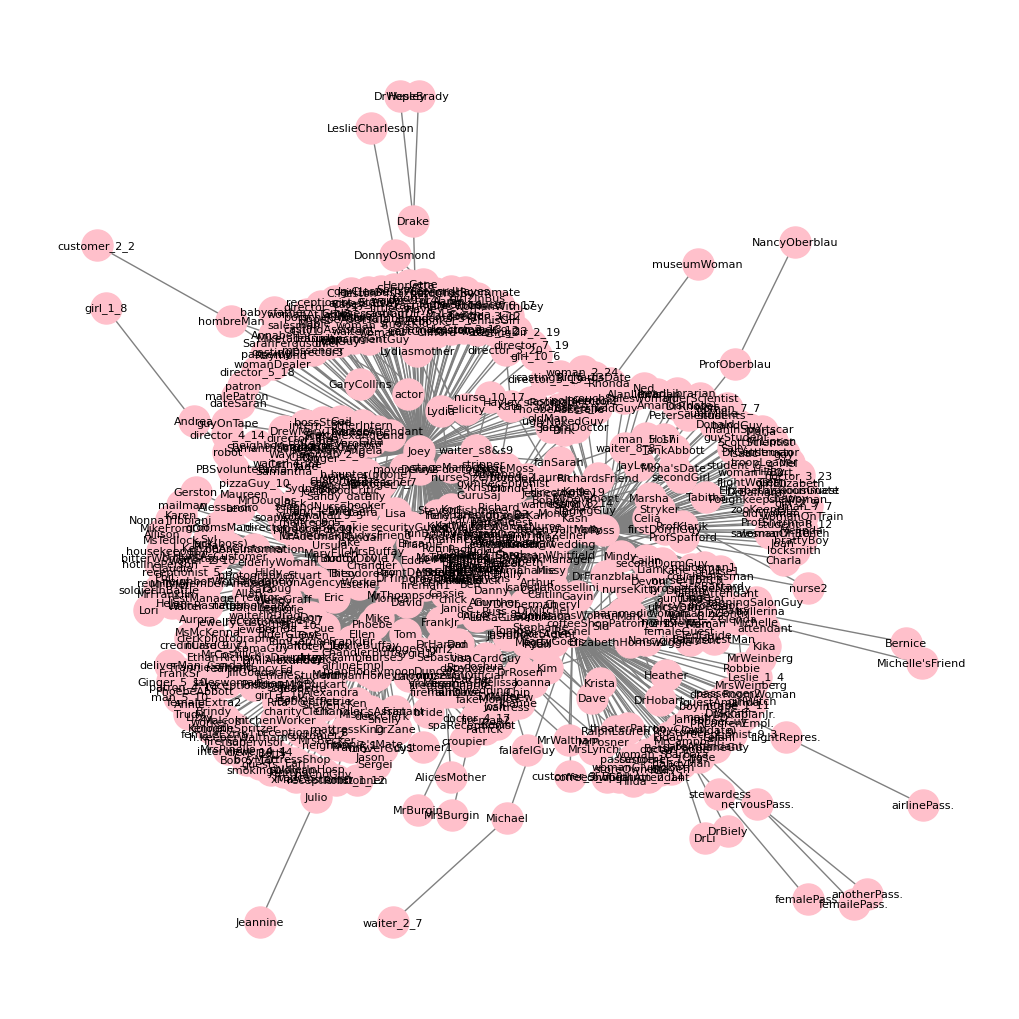

In [306]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.1)

nx.draw(G, pos, with_labels=True, node_color='pink', font_size=8, node_size=500, edge_color='gray')

### Interactive Graph Visualization

An interactive visualization of the *Friends* Season 1 social network graph is created using the `pyvis` library. This allows for an exploration of the network in a web browser:

- **HTML File**: The graph is saved as `friends_graph.html`.
- **Interactive Features**: Nodes and edges can be explored interactively, making it easier to observe relationships and connections.

The graph is opened automatically in the default browser for viewing.

In [307]:
net = Network(notebook=True, cdn_resources="in_line")
net.from_nx(G)
net.show("friends_graph.html")
webbrowser.open("friends_graph.html")

friends_graph.html


True

### Number of Nodes

Each node represents a character from *Friends* Season 1. 
* The graph contains 747 nodes, highlighting the diversity of characters that interact within the season.

In [308]:
number_of_nodes = nx.number_of_nodes(G)
print(f"The number of nodes in the graph is: {number_of_nodes}")

The number of nodes in the graph is: 747


### Number of Edges

Each edge represents an interaction between two characters in *Friends* Season 1. The graph contains 1,610 edges, indicating a high level of interconnectedness among the characters.

Theoretically we can wite the set of edges with the expression:  $E = \{ \{i, j\} \mid A_{ij} = 1 \}$

In [309]:
number_of_edges = nx.number_of_edges(G)
print(f"The number of edges in the graph is: {number_of_edges}")

The number of edges in the graph is: 1610


### Average Degree

Using the graph, we find that the average degree is approximately **4.31**. This means that, on average, each character in Season 1 interacts with around 4 other characters. This highlights the interconnectedness of the *Friends* universe, where even peripheral characters often play significant roles in advancing the story.
* Formula:

$$
\frac{2 \cdot \text{number\ of\ edges}}{\text{number\ of\ nodes}}
$$

In [310]:
average_degree = 2 * number_of_edges / number_of_nodes
print(f"The average degree of the graph is: {average_degree}")

The average degree of the graph is: 4.310575635876841


### Density

The density measures how densely the nodes are connected. 
The density of the graph is approximately **0.0058**. This low density suggests that, while the characters have numerous interactions, the network is far from fully connected. In the world of *Friends*, this reflects the natural ebb and flow of relationships—where central characters dominate the narrative while others are more loosely connected.

We define a function **`density(G)`** that calculates the density using the formula:
   $$\frac{2 \cdot \text{edges}}{n \cdot (n - 1)}$$

The link density d of an undirected graph is defined as:   
$$
d = \frac{L}{\frac{N(N - 1)}{2}} = \frac{2L}{N(N - 1)}
$$

The number maximal of links in an undirected network is: 
$$
\frac{N(N - 1)}{2}
$$

In [311]:
density = average_degree / (number_of_nodes - 1)
print(f"The density of the graph is: {density}")

The density of the graph is: 0.005778251522623111


##### Interpretation

* The graph has 747 nodes and 1610 edges, representing a network of connections between entities.
* The average degree of 4.31 indicates that, on average, each node is connectied to about 4 others.
* The graph's density, shows that it is sparsely connected, as only a small fraction of possible edges exist. This suggests the network has significant room for new connections and may have clusters or communities rather than being uniformly connected.

## **<h2 align="center"> ★ WEEK 2 ★ </h2>** 

#### Task At Hand:

1. While considering the largest component of our network, we chose computing average distance and diameter and improve the function computing the inverse distance function.

### Connectedness

The first question we ask about the *Friends*  network is: Is the network fully connected? In graph theory, a connected graph is one in which there is a path between every pair of nodes. This ensures that every character, whether central or peripheral, is part of the same overarching network.

To determine this, we check for connectedness using the following property:

`Connectedness = True if every node is reachable from every other node`

The graph is **connected**, meaning all characters in *Friends* Season 1, no matter how minor, are linked either directly or through others. This reflects the inclusive and interconnected nature of the storyline.

In [312]:
connected = nx.is_connected(G)
print(connected)

True


In [313]:
if not nx.is_connected(G):
    G = max(nx.connected_components(G), key=len)

### Diameter

Next, we explore the **diameter** of the graph. The diameter is the longest shortest path between any two nodes in the graph. It gives us insight into how far apart the most distant characters are in terms of interactions.

The diameter of the graph is **5**, meaning that even the most distant characters in *Friends* are connected through a chain of just 5 interactions. This highlights the tightly-knit nature of the show's social structure, where even minor characters are never far removed from the main cast.

* $diameter(G) = max_{i,j∈V}l(i,j)$

In [314]:
diameter = nx.diameter(G)
print(f"The diameter of the graph is equal to: {diameter}")

The diameter of the graph is equal to: 5


### Average Shortest Path Length (using 2 methods):
#### **Approach #1**: `Built-in Function`

Here, we calculate and diaplay the average of each shortest path length in our graph **G**. This is extremely telling in how "connected", on average, the nodes within our graph are. The formula we use is:

$$
\text{Average Shortest Path Length} = \frac{1}{n(n-1)} \sum_{i \neq j} d(i, j)
$$


Our output of 2.59 concludes that each pair of nodes in our graph are approx. 2.6 "steps" apart (measured in edges as steps). This values indicates that our graph G is decently connected and means that information disseminates quite quickly around the graph, as the distance between the inidivdual nodes, on average, is low. 

In here, we first use the built-in function: `nx.average_shortest_path_length(G)` to then mimick it and create our own

In [315]:
# Built-in function
average_distance = nx.average_shortest_path_length(G)
print(f"The average distance is equal to: {average_distance}")

The average distance is equal to: 2.5903578568070316


The average shortest path length is approximately **2.59**, meaning that, on average, any character in Season 1 is just over 2 interactions away from any other character. This low average reflects the compact and interwoven narrative structure of *Friends*.

### Average Shortest Path Length:
#### **Approach #2**: *Manual Calculation*

The **average shortest path length** tells us how close characters are on average. We revisited the same computation, but in this way we customly operate.

* First, we compute the shortest path lengths between all node pairs
* It then iterates through the dictionary of path lengths
* Avoiding self-loops, it adds the length for every unique pair, and then counts the valid pairs

In [316]:
path_lengths = dict(nx.all_pairs_shortest_path_length(G))

total_path_length = 0
pair_count = 0

for source_node, target_dict in path_lengths.items():
    for target_node, path_length in target_dict.items():
        if source_node != target_node: # Avoid self-loops
            total_path_length += path_length
            pair_count += 1


* Secondly, we divide the total length of shortest paths and computes a basic average 
* This way, we manually calculate the average

In [317]:
average_shortest_path_length = total_path_length / pair_count if pair_count > 0 else 0
print(f"The average shortest path length is: {average_shortest_path_length}")

The average shortest path length is: 2.5903578568070316


**INTERPRETATION OF COMPARISON**:
Here, we get the same result as the built-in function, 2.59, ensuring us that it is correct.

##### Interpretation of the statistics of the graph

* The graph's **`connectivity`** indicates that it is fully connected, meaning all nodes are part of a single component. This suggests that every character in the "Friends" network is indirectly connected to all others, ensuring cohesion in the network.
* The **`graph diameter`** of 5 signifies that the longest shortest path between any two nodes is 5 steps. This highlights that even the most distant connections in the network are relatively close, reflecting the tight-knit social structure among the characters.
* The **`average distance`** of approximately 2.59 supports the idea of a highly interconnected network, as it takes an average of about 2.6 steps to connect any two characters. This small average distance underscores the high efficiency of the netowkr for information or influence flow.
* The calculated **`average shortest path length`** confirms the low average distance between nodes, reiterating that the social ties within the "Friends" network are strong and compact, facilitating easy communication and interaction.

### Inverse Distance Function

To calculate the average inverse distance, we use three functios `distanceMatrices()`, `distance()` and `averageInverse()`.

#### distanceMatrices() Function

* Line 1: We define a function **distanceMatrices(G)** to return the distance matrices for our network's graph
* Line 2-3: Transforms G into an adjacency matrix and assigns the result to varible "A", using **nx.to_numpy_array(G, weight=None)**. The "None" argument implies the unweightedness of the graph G. The matrices themselves will hold a property of 1 or 0, indiciating whether or not an edge exists between two nodes, i.e. i and j. We create a dictionary "distance_matrices" to store the matrices.
* Line 5-12: Within this for loop, we iterate over our path lengths (l) between the given range of 1 to the "diameter" variable we defined earlier. The if-statement proclaims that for all lengths (l) equaling 1, the correlated matrix is the ofiginal matrix A, that we defined above. We store this as **distance_matrices[1] = A**. For all lengths (l) above 1, a matrix is computed for lengths (l-1) by matrix A. We employ **np.dot(M, A)** to find matrix products, and each iteration yields the number of paths of length (l) between each node pair.

The functionality behind **distanceMatrices(G)** computes the equation: 
$$
M_l = A^l
$$

Where:
- $M_l = A^l$ represents the matrix of paths of length $(l)$ between each pair of nodes.
- $A$ is the adjacency matrix of the graph $G$.
- $A^l$ represents the matrix obtained by taking the $l-th$ power of the adjacency matrix $A$.

In [318]:
def distance_matrices(G):
    A = nx.to_numpy_array(G, weight=None)
    distance_matrices = {}

    for l in range(1, diameter + 1):
        if l == 1:
            M = A
            distance_matrices[1] = A
        else:
            M = distance_matrices[l - 1]
            distance_matrices[l] = np.dot(M, A)
    return distance_matrices 

Here, we call the function we defined above and store the returned dictionary into the variable "distance_matrices"

In [319]:
distance_matrices = distance_matrices(G)

### Distance

* Line 1: We define a function **distance(source_node, target_node)** to determine the shortest distance between two nodes
* Line 2-3: Checks whether the designated nodes are the same, as the distance between the same node is 0. 
* Line 5-7: This for loop iterates over the dictionary keys of "dictionary_matrices" and checks whether there is a non-empty entry in the matrix. If non-zero, this indicates that a path of length (l) between the node pairs exists and returns that length (l) as the shortest distance between the source and target nodes. 

In [320]:
def distance(source_node, target_node):
    if source_node == target_node:
        return 0
    
    for l in distance_matrices:
        if distance_matrices[l][source_node, target_node] != 0:
            return l

### Average Inverse

* Line 1: We establish the averageInverse(G) function to improve the calculation of the average inverse of distances between the graph nodes.
* Line 2: Sets the variable "sum_inverse_distance" to 0, which will be used to hold the sum of the inverse distances
*  Line 3: Calculates the number of nodes in the graph G using len(G.nodes) and stores it in "number_of_node".
* Line 4-7: This for loops iterates over each node $i$ in the graph G and its nested loop iterates over each node $j$, in the position: $j\ > i$. For each node pair or $(i, j)$, it calculates the distance between nodes $i$ and $j$ using the function `distance(i, j)`. If the distance is non-zero, it adds the reciprocal of the distance to `sum_inverse_distance`:
$$
\frac{1}{{distance}(i, j)}
$$

    
* Line 8-13: Checks if `sum_inverse_distance` is 0. If true, it means there are no edges in the graph, and the function sets `result` to `"No edges"`. Otherwise, the function calculates the average inverse distance by dividing the total `sum_inverse_distance` by the number of unique node pairs:
For $n$ nodes, the number of unique pairs is given by:
$$
\binom{n}{2} = \frac{n(n-1)}{2}
$$

The result is then returned at the end of the functions course

##### Analysis:
If the distance between nodes $i$ and $j$ is large, then the inverse distance result will be relatively small, and vice versa with a large distance, that results in a relatively large inverse distance. 

This function calculates the "harmonic mean" as we referenced earlier, which has the following equation:
$$
\frac{1}{\frac{sum\_of\_inverse\_distance}{number\_of\_pairs}}
$$ 

In [321]:
def average_inverse(G):
    sum_inverse_distance = 0
    number_of_nodes = len(G.nodes)

    for i in range(number_of_nodes):
        for j in range(i + 1, number_of_nodes):
            distance_ij = distance(i,j)
            if distance_ij != 0:
                sum_inverse_distance += 1 / distance_ij
    
    if sum_inverse_distance == 0:
        result = 'No edges'
    else:
        result = sum_inverse_distance / (number_of_nodes * (number_of_nodes - 1) / 2)
    
    return result

The result of the **averageInverse(G)** function is revealed in phrase format below.

In [322]:
average_inverse = average_inverse(G)
print(f"The average inverse distance is equal to; {average_inverse}")

The average inverse distance is equal to; 0.40651177842051245


##### Interpretation

The average inverse distance represents the reciprocal of shortest path distances across all pairs, averaged. A smaller value suggests that on average, nodes are relatively far from each other.

A value closer to zero generally indicates low connectivity across the network, whereas higher values would indicate closer or more direct conectivity between nodes. Since we also had a quite low density and a low average inverse, we can tell that the graph is really sparsed.

## **<h2 align="center"> ★ WEEK 3 ★ </h2>** 

#### Task At Hand:

1. Depending on what seemed more relevant in our graph, we picked the notion of betweenness centrality.
2. Provide a code computing the given centrality using basic functions of networkx
3. Discuss why you picked this measure and who is the most central in your network based on your choice.
4. Provide the cumulative distribution for this centrality and give a graphical representation

### Betweenness Centrality

#### **Why Betweenness Centrality?**

Betweenness Centrality measures the importance of a node by calculating how often it lies on the shortest paths between other nods in the network. In the context of the Friends graph, it is valuable because it identifies characters who act as "bridges" between groups or sub-networks.

These "bridge" characters are crucial for the flow of information or interactions in the network. For example, in Friends, a character with high betweenness centrality might not just have many friends but could connect otherwise unconnected groups of characters. This reflects their role as facilitators of social interaction and narrative connections in the storyline.

By analyzing betweenness centrality, we can uncover characters who play key roles in maintaining the network's connectivity and understand their influence on the overall dynamics of the Friends group.

#### **BFS to compute the shortest paths and predecessors**

The **`bfs_shortest_paths`** function performs a Breadth-First Search (BFS) to find the shortest paths and predecessors from a specified start node to all other nodes in the graph. It initializes dictionaries to store predecessors, the count of shortest paths, and distances from the start node, as well as a queue for BFS traversal.

As the BFS progresses, each node is processed by visiting its unvisited neighbors. For each neighbor at the next distance level, the function updates the shortest path count, records the current node as a predecessor, and adds the neighbor to the queue. The function continues unil all reachable nodes are processed, then returns the predecessors, shortest path counts, distances.

* Shortest Path Count dict helps determine the number of shortest paths passing through each node
* Predecessors allow you to trace paths backward from a target node to the start, which is neccessary for calculating dependencies
* Distances are required to ensure only shortest paths are considered

In [323]:
def bfs_shortest_paths(graph, start):
    """ Returns the number of shortest paths and predecessors for each node
    """
    predecessors = {node: [] for node in graph}
    shortest_paths = {node: 0 for node in graph}
    shortest_paths[start] = 1
    distances = {node: -1 for node in graph}
    distances[start] = 0
    queue = deque([start])

    while queue:
        current = queue.popleft()
        for neighbor in graph[current]:
            if distances[neighbor] == -1:
                distances[neighbor] = distances[current] + 1
                queue.append(neighbor)
            if distances[neighbor] == distances[current] + 1:
                shortest_paths[neighbor] += shortest_paths[current]
                predecessors[neighbor].append(current)
    return predecessors, shortest_paths, distances

# Shortest Path Count dict helps determine the number of shortest paths passing through each node
# Predecessors allow you to trace paths backward from a target node to the start, which is neccessary for calculating dependencies
# Distances are required to ensure only shortest paths are considered 

### Computing Betweenness Centrality

**`betweenness_centrality`** returns each node's betweenness centrality by initializing all nodes with a centrality of 0 then for each node:

* use `bfs_shortest_paths` to find the number of shortest paths, predecessors, and distances from that node to all others.
* calculate the dependency of each node, which represents how much its predecessors rely on it to connect to the starting node via the shortest paths. 
* update centrality: If a node is not the starting node, its dependency is added to its centrality score.
* normalize if needed

The dependency formula for each predecessor $p$ of $v$ is:
   $$ 
   \delta(s, p) += \frac{\sigma(s, p)}{\sigma(s, v)} \times (1 + \delta(s, v)) 
   $$
   where $\sigma(s, p)$ and $\sigma(s, v)$ are the number of shortest paths from $s$ to $p$ and $s$ to $v$, respectively. And $\delta$ is the dependency.

Normalization:
   $$
   Centrality(v) = \frac{Centrality(v)}{(N-1)(N-2)/2}
   $$
   where $N$ is the number of nodes in the graph.

In [324]:
def betweenness_centrality(graph, normalized=True):
    centrality = {node: 0 for node in graph}

    for start in graph:
        predecessors, shortest_paths, distances = bfs_shortest_paths(graph, start)
        dependency = {node: 0 for node in graph}

        sorted_nodes = sorted(distances, key=lambda x: distances[x], reverse=True)
        for node in sorted_nodes:
            for predecessor in predecessors[node]:
                ratio = (shortest_paths[predecessor] / shortest_paths[node])
                dependency[predecessor] += ratio * (1 + dependency[node])
            if node != start:
                centrality[node] += dependency[node]
        
    
    if normalized:
        total_nodes = len(graph)
        # for an undirected graph we divide by 2 
        normalization_factor = (total_nodes - 1) * (total_nodes - 2) / 2
        for node in centrality:
            centrality[node] /= normalization_factor
    
    return centrality

In [66]:
centralities = betweenness_centrality(G)
print(centralities)

{'Monica': 0.36630100042715974, 'Joey': 0.6475967243824335, 'Chandler': 0.462466850902183, 'Phoebe': 0.38145923463492876, 'Ross': 0.5436833962161991, 'Rachel': 0.4764419536635994, 'waitress': 0.0, 'LeonardGreen': 0.005947532044838488, 'Paul': 0.0, 'Barry': 0.0063533952817289175, 'Franny': 0.0, 'Marsha': 0.0, 'Carol': 0.00356456475732436, 'Judy': 0.005282194104560687, 'Jack': 0.003241959260526353, 'Susan': 0.0008422047191682095, 'Robbie': 0.0, 'DrOberman': 0.0, 'Mindy': 0.001139046042513305, 'Paula': 0.0, 'Alan': 0.0, 'Lizzy': 0.0, 'Allan': 0.0, 'Joanne': 0.0, 'Kiki': 0.0, 'Leslie_1_4': 0.0, 'nurseSizemore': 0.0, 'pizzaGuy': 0.0, 'brattyBoy': 0.0, 'neighbor': 0.0, 'visaCardGuy': 0.0, 'Angela': 0.0, 'Bob': 0.0, 'Janice': 0.00711239175963788, 'Tony': 0.0, 'horribleWoman': 0.0, 'actress(Eva)': 0.0, 'Aurora': 0.0, 'director_1_6': 0.0, 'JillGoodacre': 0.0, 'MrHeckles': 0.0007930834801662704, 'Paolo': 0.0, 'Shelly': 0.0, 'auntLillian': 0.0, 'NanasNurse': 0.0, 'Nana': 0.0, 'Andrea': 0.00536193

#### **Who is the most central character?**

Here, we find and print the node within our graph G, that has the **highest betweenness centrality**, and then displays that node's value. 
This essentially is a metric that determines how often each node performs as a connector/bridge along the shortest paths between every other partipicant in the network. 

This part simply chooses the greatest values amongst the nodes.

We can assume this character, in our case, is personable and sociable, with ability to find connections with a majority of the vast cast of *Friends*. 

The output gives us a centrality of about **0.648** and determines that the most central character is....
### **Joey!**

In [325]:
highest_centrality_node = max(centralities, key=centralities.get)
highest_centrality_value = centralities[highest_centrality_node]
print(f"The node with the highest centrality is node {highest_centrality_node} with a betweenness centrality of {highest_centrality_value}")

The node with the highest centrality is node Joey with a betweenness centrality of 0.6475967243824335


##### **Interpretation**:

This output identifies Joey as the most central character in the network based on betweenness centrality, with a score of 0.6476. This indicates that Joey plays a critical role as a connector in the network, frequently acting as a bridge between different nodes (or characters). His position allows him to facilitate communication and interactions, highlighting his importance in th overall structure of relationships in the network.

### Plotting the cumulative centrality

The cumulative distribution of betweenness centrality values is plotted by extracting and sorting the unique centrality values from centralities. For each unique centrality value x, it computes how many nodes have a centrality greater than or equal to x, storing the results in `cdfb_y`; `cdfb_x` holds the sorted centrality values.

In [326]:
centrality_values = list(set(list(centralities.values())))
centrality_values.sort()

cdfb_x = centrality_values
cdfb_y = []
for x in cdfb_x:
    y = sum(value >= x for value in centralities.values())
    cdfb_y.append(y)

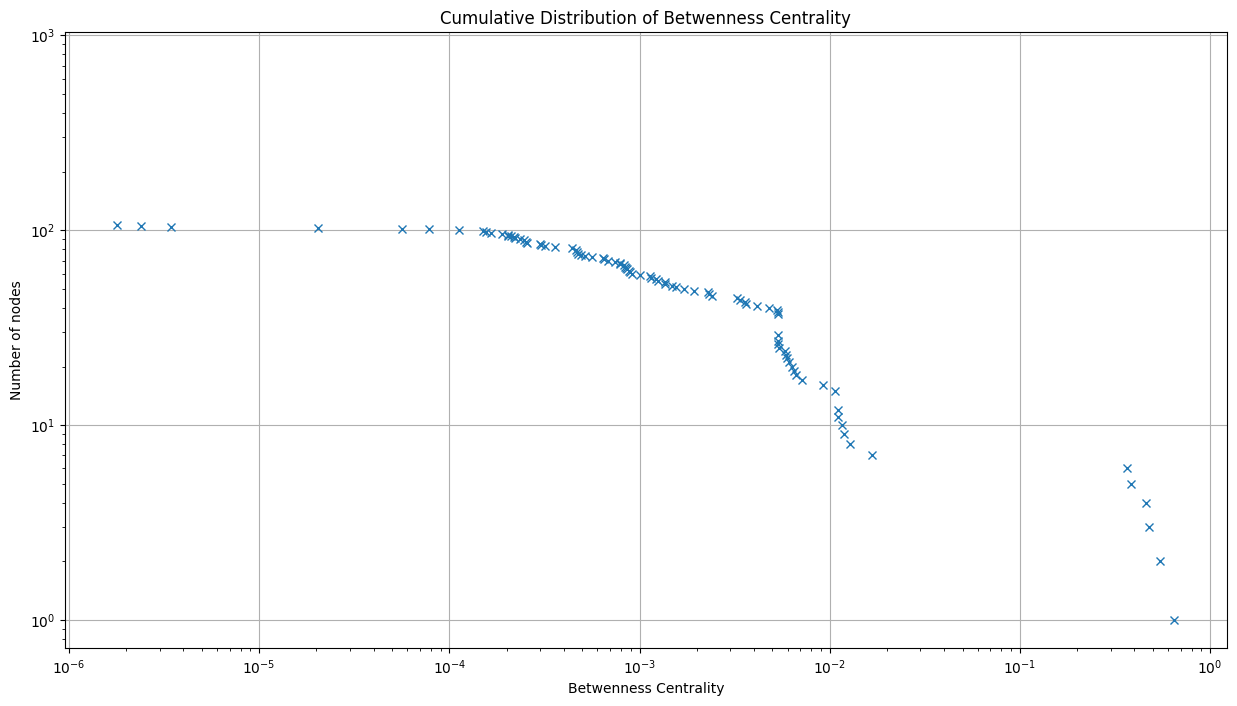

In [328]:
plt.figure(figsize=(15, 8))
plt.plot(cdfb_x, cdfb_y, "x")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Betwenness Centrality")
plt.ylabel("Number of nodes")
plt.title("Cumulative Distribution of Betwenness Centrality")
plt.grid(True)
plt.show()

##### **Interpretation**:

The cumulative distribution plot of betweenness centrality (on a log-log scale) shows that most nodes in the network have very low centrality, meaning they play minor roles in bridging connections between other nodes. However, a few nodes exhibit much higher centrality, acting as critical connectors or "hubs" in the network. These nodes are likely key characters, like Joey, who have significant influence over the flow of interactions and relationships in the network, reinforcing their pivotal roles.

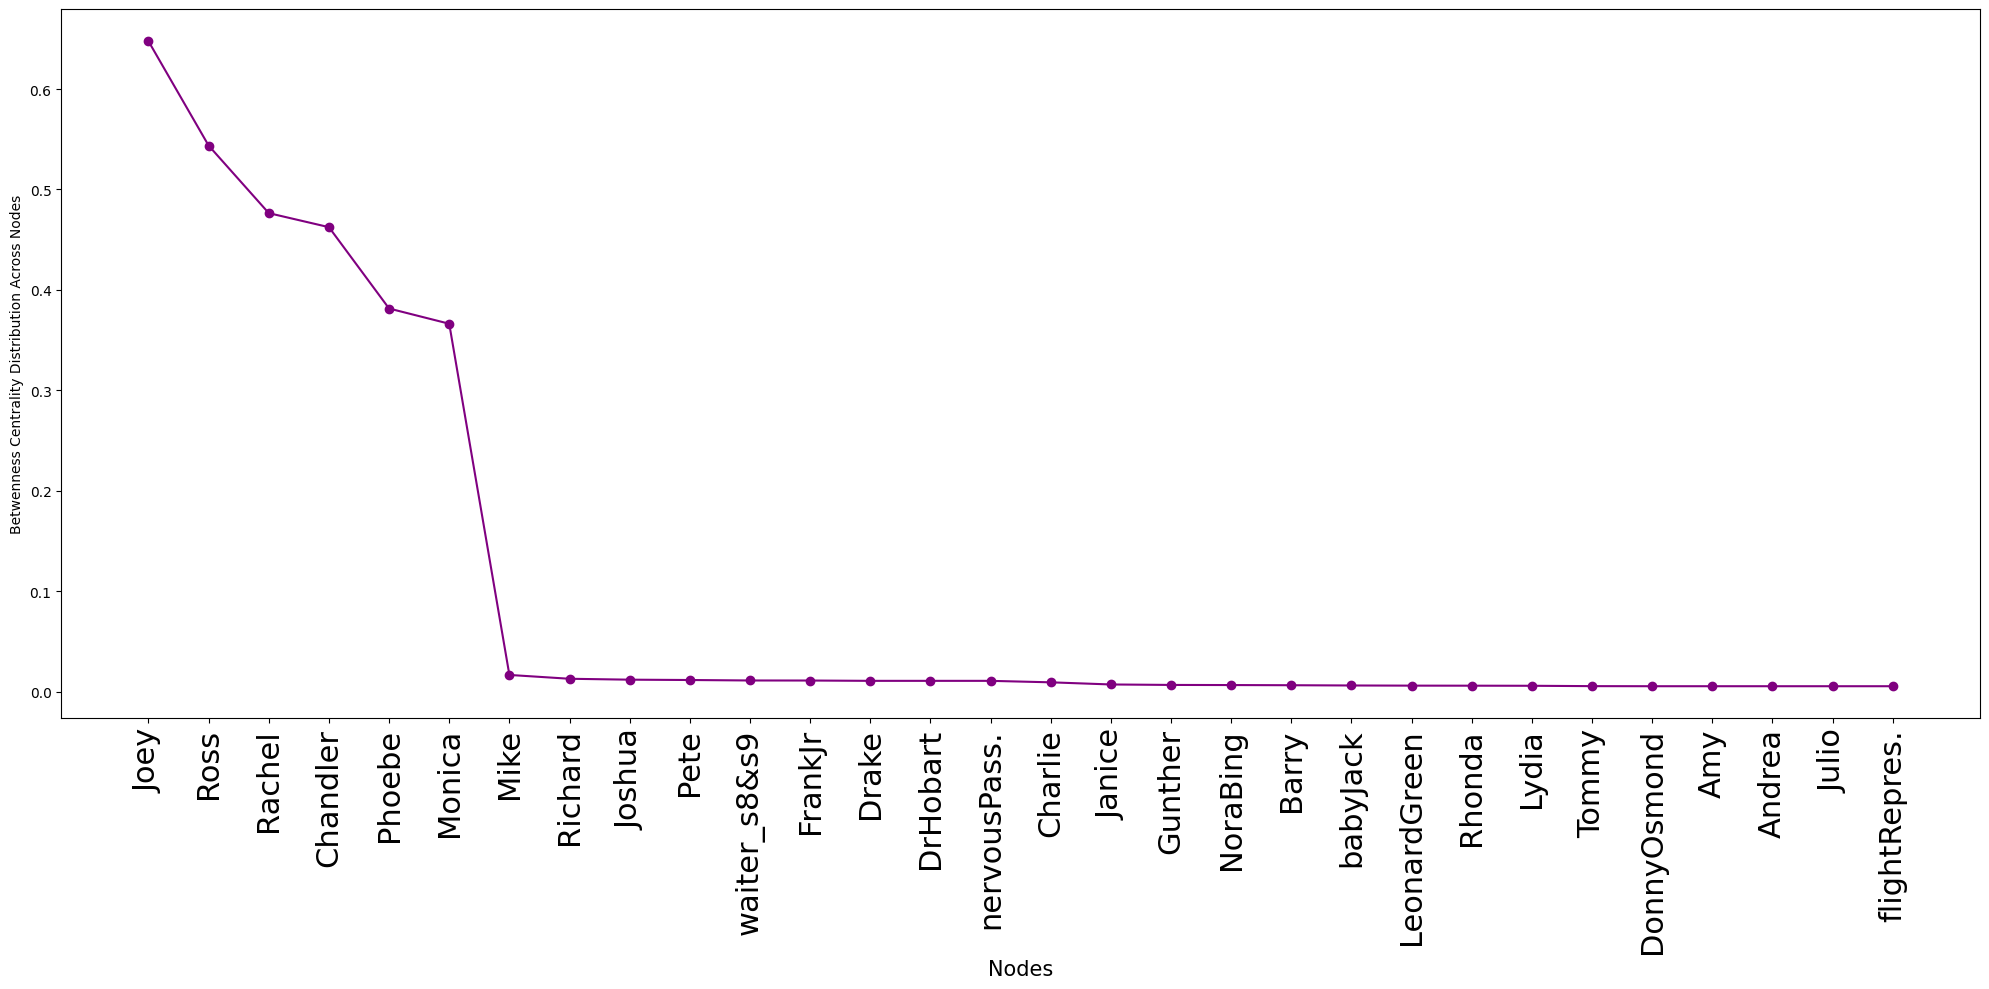

In [329]:
sorted_betwenness = sorted(centralities.items(), key=lambda x: x[1], reverse=True)
nodes, scores = zip(*sorted_betwenness[:30])

plt.figure(figsize=(20, 10))
plt.plot(nodes, scores, marker='o', linestyle='-', color='purple')
plt.xticks(rotation=90, fontsize=22)
plt.xlabel("Nodes", fontsize=15)
plt.ylabel("Betwenness Centrality Distribution Across Nodes")
plt.tight_layout()
plt.show()

##### **Interpretation**:

The graph shows the distribution of betweenness centrality among the top 30 nodes in the network. Joey stands out with the highest centrality score, emphasizing his role as a key connector facilitating interactions between different characters. Ross, Rachel and Chandler follow, also playing siginificant but slightly lesser roles in connecting groups. The steep drop after the first few nodes indicated that the majority of other characters, like Mike and Richard, contribute far less to the overall network connectivity. This highlights the core group as the backbone of the network's relationships.

## **<h2 align="center"> ★ WEEK 5 ★ </h2>** 

#### Task At Hand, Part 1:

1. Run build-in pagerank with parameter alpha=0.15.
Be careful there is a trap.
2. Identify the node with the highest PageRank, compare it with the one you got from Week 3, an give an interpretation to the possible difference.
3. Provide the cumulative distribution, compare it with the one you got from Week 3, and comment the results.
4. Treat weighted graphs as unweighted and links in undirected graph as doubly directed (each undirected link becomes a directed link in both directions). Additionally, make sure you run the PageRank algorithm on a connected graph.

### PageRank

#### Making sure the graph is connected

In [330]:
nx.is_connected(G)

True

#### Calculating PageRank with Convergence

This code implements a PageRank algorithm with convergence checking for a graph. It converts the given graph into a directed graph and initializes all nodes with equal PageRank. The **`while`** loop updates the PageRank values iteratively using the damping factor **`alpha`** and stops when the change (**`delta`**) across all nodes falls below the specified tolerance (**`tol`**) or the maximum number of iterations (**`max_iter`**) is reached. If convergence is achieved, it reports the number of iterations taken; otherwise, it warns that the algorithm did not converge. The final PageRank values and iteration count are returned, helping to rank the importance of nodes in the graph based on link structure.

In [331]:
def calculate_page_rank_with_convergence(graph, alpha, tol=1e-6, max_iter=100):
    directed_graph = nx.DiGraph()

    for u, v in graph.edges():
        directed_graph.add_edge(u ,v)
        directed_graph.add_edge(v, u)

    pagerank = {node: 1 / len(directed_graph.nodes) for node in directed_graph.nodes}
    iterations = 0
    delta = float('inf')

    print(f"{'Iteration':<10}{'Delta':<10}")
    while delta > tol and iterations < max_iter:
        new_pagerank = nx.pagerank(directed_graph, alpha=alpha, nstart=pagerank)
        delta = max(abs(new_pagerank[node] - pagerank[node]) for node in directed_graph.nodes)
        pagerank = new_pagerank
        iterations += 1
        print(f"{iterations:<10}{delta:.8f}")
    
    if iterations == max_iter:
        print("Warning: PageRank did not converge within the maximum iterations.")
    else: 
        print(f"PageRank converged is {iterations} iterations.")

    return pagerank, iterations

### PageRank Scores

*RUN 1*:
* With a damping factor of `0.15`, there is a higher probability that this randomization occurs to another node, in a random fashion, rather a deterministic one. This leads to a faster convergence, as seen in our output of only **3 iterations**. 

In [332]:
pagerank_scores, iterations = calculate_page_rank_with_convergence(G, 0.15)

Iteration Delta     
1         0.02330076
2         0.00000733
3         0.00000097
PageRank converged is 3 iterations.


*RUN 2*:
* With a damping factor of `0.5`, there is a much more balanced probability between following the path of surrounding links in comparison to jumping randomly. This leads to a more moderate convergence, as seen in our output of **6 iterations**; this also insinuates that the computation of PageRank here is more receptive to link patterns/node connection behavior

In [333]:
pagerank_scores_, iterations_ = calculate_page_rank_with_convergence(G, 0.5)

Iteration Delta     
1         0.05983210
2         0.00002073
3         0.00000910
4         0.00000396
5         0.00000174
6         0.00000076
PageRank converged is 6 iterations.


In [334]:
sorted_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)
print("Top 5 characters by PageRank: ")
for character, score in sorted_pagerank[:5]:
    print(f"{character}: {score}")

Top 5 characters by PageRank: 
Joey: 0.024645804878466484
Ross: 0.021019503397470114
Chandler: 0.019143086617503403
Rachel: 0.017859962904011272
Phoebe: 0.0163097764975815


##### Interpretation

Joey having the highest PageRank aligns with his role as a central igure in the Friends network, as PageRank identifies nodes with high influence due to their connections to other important nodes. His ranking matches his high betweenness centrality, reinforcing that Joey acts as a "bridge" character, connecting different parts of the network and facilitating interactions. This result highlights his pivotal role not just in the narrative but also in maintaining the cohesion of the group dynamics. Other main characters like Ross and Chandler also rank highly, reflecting their consistent involvement and connectivity within the group's relationships.

### Plotting the cumulative distribution for PageRank

In [335]:
list_values = list(set((list(pagerank_scores.values()))))
list_values.sort()

cdfp_x = list_values
cdfp_y = []
for x in cdfp_x:
    y = sum(value >= x for value in pagerank_scores.values())
    cdfp_y.append(y)

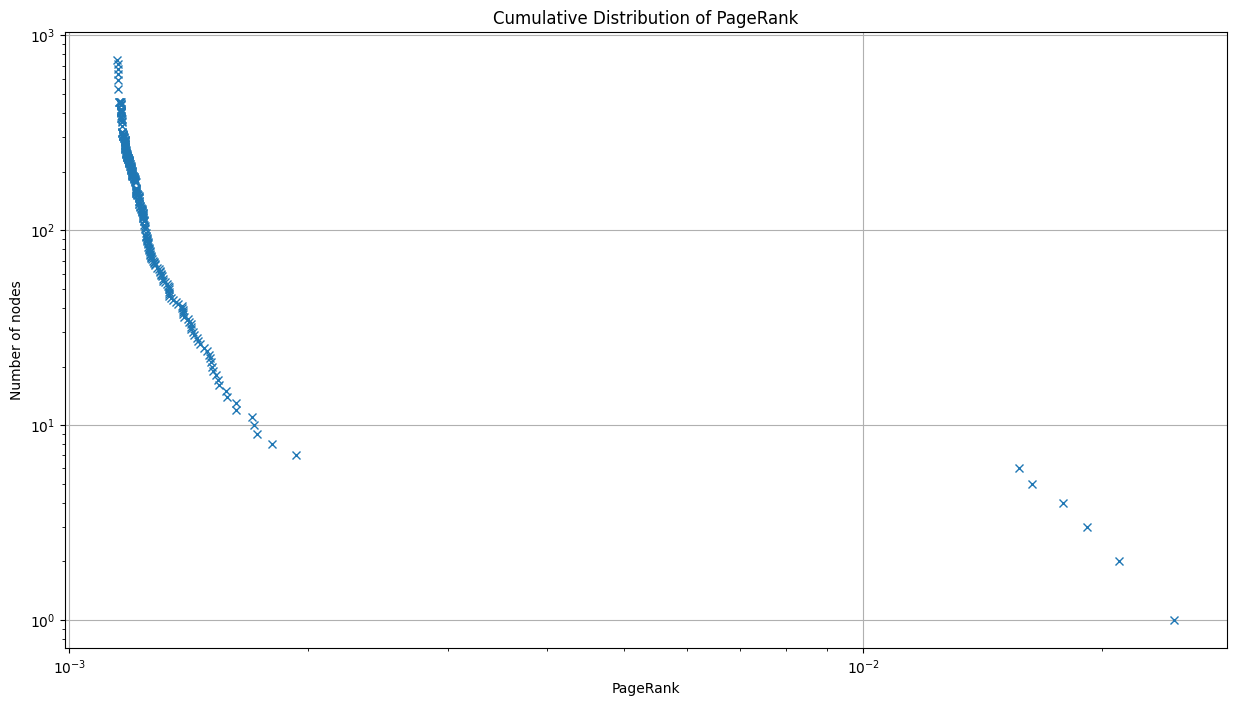

In [336]:
plt.figure(figsize=(15, 8))
plt.plot(cdfp_x, cdfp_y, "x")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("PageRank")
plt.ylabel("Number of nodes")
plt.title("Cumulative Distribution of PageRank")
plt.grid(True)
plt.show()

##### Interpretation

The cumulative distribution of PageRank for the Friends graph reveals that most characters have low PageRank scores, indicating they are less influential or central to the network. These could represent minor or one-time characters. On the other hand, the few nodes with high PageRank values likely correspond to the main characters like Rachel, Ross, Joey, etc, who have more connections and interactions, making them the most central and influential in the storyline. This aligns with the show's structure, where the main characters dominate the narrative.

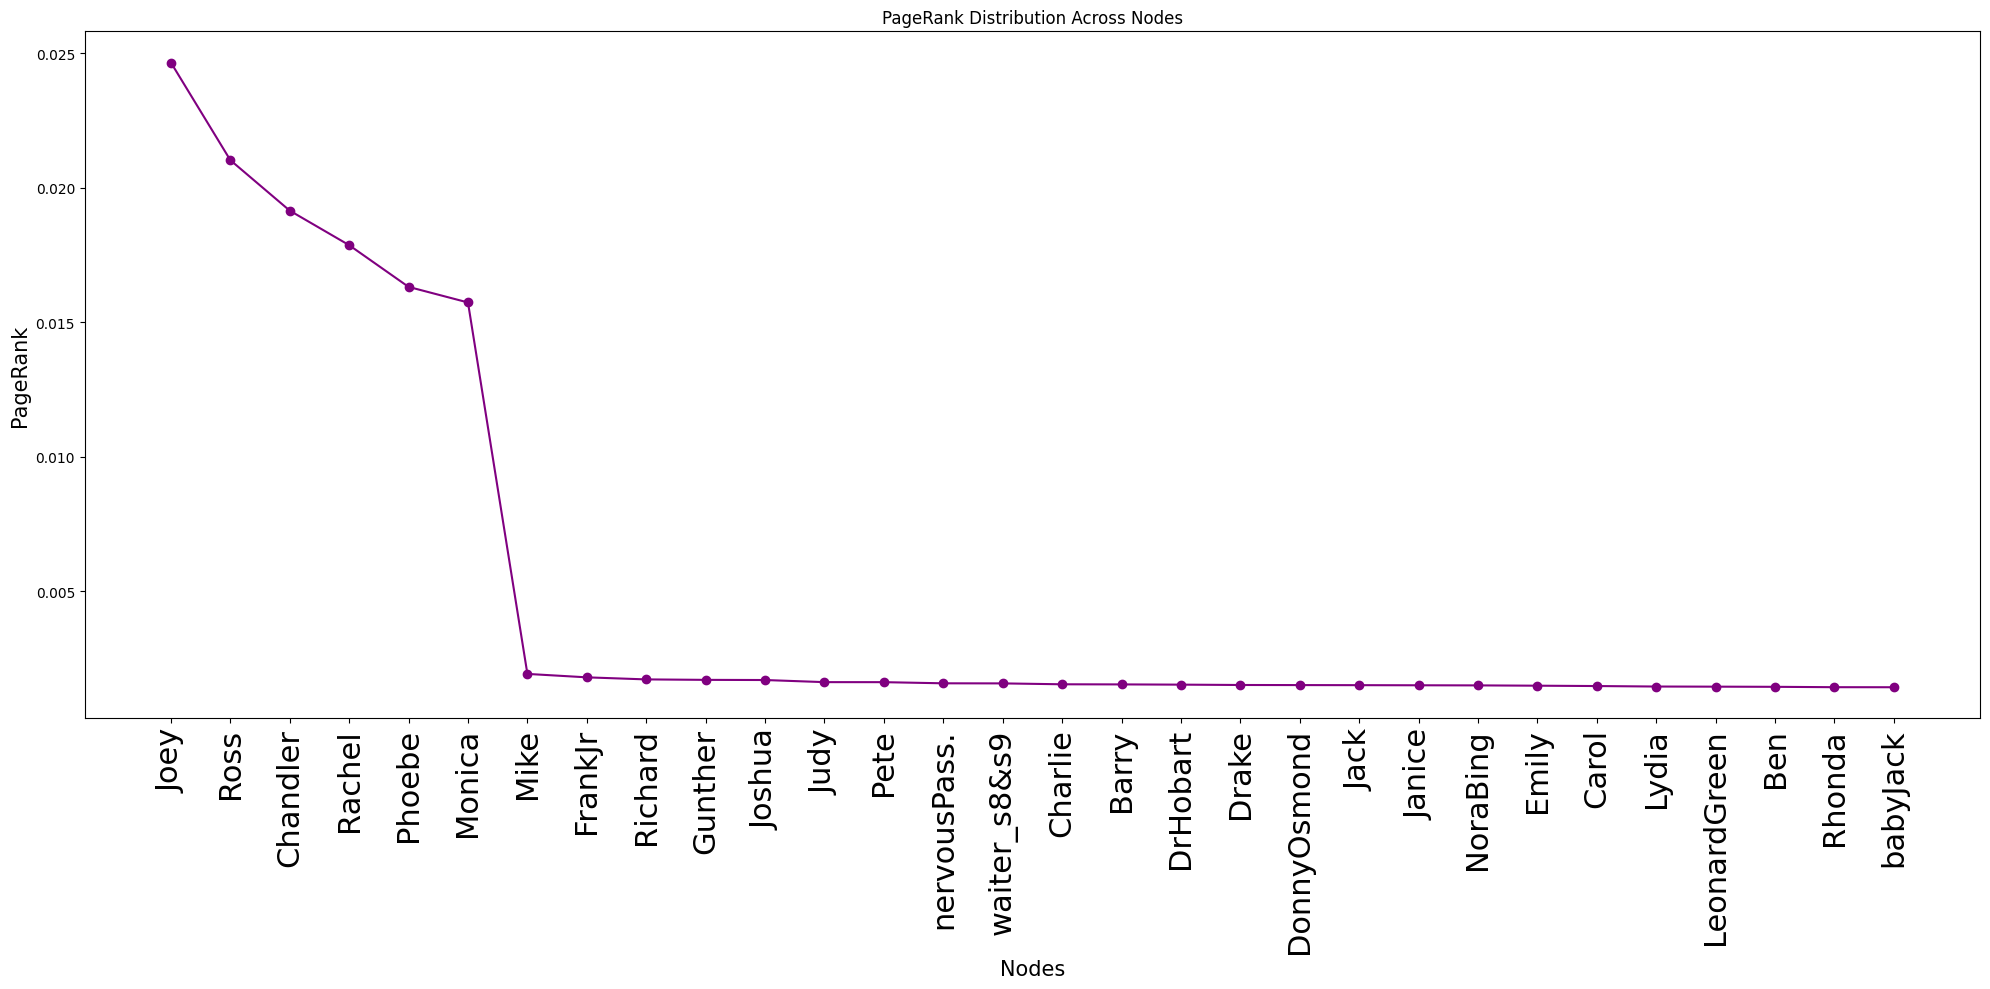

In [337]:
sorted_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)
nodes, scores = zip(*sorted_pagerank[:30])

plt.figure(figsize=(20, 10))
plt.plot(nodes, scores, marker='o', linestyle='-', color='purple')
plt.xticks(rotation=90, fontsize=22)
plt.xlabel("Nodes", fontsize=15)
plt.ylabel("PageRank", fontsize=15)
plt.title("PageRank Distribution Across Nodes")
plt.tight_layout()
plt.show()

##### Interpretation

* This graph shows the PageRank distribution across the top 30 nodes in the Friends network. Joey ranks highest, confirming his strong centrality and influence within the group. 
* Ross and Chanfler follow closely, reflecting their significant roles and connections. The steep drop in PageRank after the main charactes, like Monica, Rachel, and Phoebe, highlights the decreasing importance of secondary characters such as Mike and Gunther. 
* This distribution captures the structure of the Friends universe, where the main six characters dominate interactions, while secondary figures play more peripheral roles. The curve also ilustrates the highly centralized nature of the network.

 ...

#### Task At Hand, Part 2:

1. Program your own function computing k-shell and k+1 core for all possible values of k
2. Plot the k+1-core for an adequate choice of k

### K-shell and K+1 core

This code defines a function to compute k-shells and k+1-cores for a given graph, itereatively extracting nodes based on their connectivity.

The function initializes dicitonaries to store nodes in each k-shell and k+1-core. It creates a copy of the original graph to avoid modifying it. For each shell level k, the code identifies nodes with degrees less than k and removes them until only nodes with sufficient connectivity remain.

These remaining nodes represent the k-shell. After determining the k-shell, it computes the k+1-core by creating another graph copy and applying the same process for nodes with degrees less than k+1.

The final k-shell and k+1-core results are stored in dictionaries for each k value, allowing a detailed view of the network's layered connectivity structure. This approach helps reveal hierarchical levels of node importance within the network.

In [338]:
def compute_k_shell_core(graph):
    k_shells = {}
    k_plus_1_cores = {}

    G = graph.copy()
    k = 0

    while G.number_of_nodes() > 0:
        nodes_to_remove = [node for node, degree in G.degree() if degree < k]

        while nodes_to_remove:
            G.remove_nodes_from(nodes_to_remove)
            nodes_to_remove = [node for node, degree in G.degree() if degree < k]

        k_shells[k] = list(G.nodes())

        k_plus_1_core_graph = G.copy()
        nodes_to_remove = [node for node, degree in k_plus_1_core_graph.degree() if degree < k + 1]
        while nodes_to_remove:
            k_plus_1_core_graph.remove_nodes_from(nodes_to_remove)
            nodes_to_remove = [node for node, degree in k_plus_1_core_graph.degree() if degree < k + 1]

        k_plus_1_cores[k + 1] = list(k_plus_1_core_graph.nodes())
        k += 1
    return k_shells, k_plus_1_cores

In [339]:
k_shells, k_plus_1_cores = compute_k_shell_core(G)

In [340]:
for k in sorted(k_shells.keys()):
    print(f"\n{k}-shell:")
    print(" Nodes:", ", ".join(k_shells[k]))

    if (k + 1) in k_plus_1_cores and k_plus_1_cores[k + 1]:
        print(f"{k+1}-core:")
        print(" Nodes:", ", ".join(k_plus_1_cores[k + 1]))


0-shell:
 Nodes: Monica, Joey, Chandler, Phoebe, Ross, Rachel, waitress, LeonardGreen, Paul, Barry, Franny, Marsha, Carol, Judy, Jack, Susan, Robbie, DrOberman, Mindy, Paula, Alan, Lizzy, Allan, Joanne, Kiki, Leslie_1_4, nurseSizemore, pizzaGuy, brattyBoy, neighbor, visaCardGuy, Angela, Bob, Janice, Tony, horribleWoman, actress(Eva), Aurora, director_1_6, JillGoodacre, MrHeckles, Paolo, Shelly, auntLillian, NanasNurse, Nana, Andrea, girl_1_8, Lowell, Brian, Terry, customer_1_9, obsessionGirl, Marcel, David, Max, Sandy_date, funBobby, kids, girl_1_10, comaGuy, NoraBing, JayLeno, Syl, receptionist_1_12, Roger, MrTribbiani, Ronni, GloriaTribbiani, Kristen, Lorraine, waiter, firemanDave, Charlie, Ed, firemanCharlie, firemanEd, MsTedlock, Celia, Wendy, MrCostilick, Helen, Steve, Fran, Ursula, Nina, MrDouglas, H.HuntAsCustomer, L.KenzleAsCustomer, receptionist_1_17, admissionsWoman, DrMitchel, DrRosen, Betty, PhoebeAsUrsula, auntIris, Barbara, customer_1_19, LuisaGianetti, Samantha, Samanth

#### Plot the k+1-core for an adequate choice of k

1. Choosing a value for k that makes sense based on the network analysis. An "adequate choice" means selecting a value where the k+1-core still contains a meaningful subset of nodes but is not too sparse or too dense. Typically, is better to choose a mid-to-high value of k to focus on the nodes that are more central or connected within the graph.

2. Then we extract the k+1-core subgraph for this chosen value of k. The k+1-core is the subgraph where each node has at least k+1 neighbors.

3. Then we plot the k+1-core subgraph to visualize the connectivity and structure of this core network. This can provide insight into the tightly-knit nodes within the network at this core level.

In [341]:
def plot_k_plus_1_core(G, k):
    k_plus_1_core = nx.k_core(G, k + 1)

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(k_plus_1_core)
    nx.draw(k_plus_1_core, pos, with_labels=True, node_color="purple", edge_color="gray", node_size=500, font_size=10)
    plt.title(f"{k+1}-core of the network")
    plt.show()

#### By examining the k+1-core...
We gain insights into the central connectivity structure within the network, helping us identify which nodes (or characters), are fundamental to maintaining the network's integrity at higher levels of connectivity.

#### Choosing K

For this part of the analysis, we explored different values of *k* to identify an "adequate" *k* for plotting the *k+1*-core of the network. By adjusting k, we can see how the structure of the network changes at various levels of connectivity. A lower k will capture more nodres but may include less connected parts of the network, whereas a higher k will focus on the central, most interconnected nodes, providing a clearer view of the network's core.

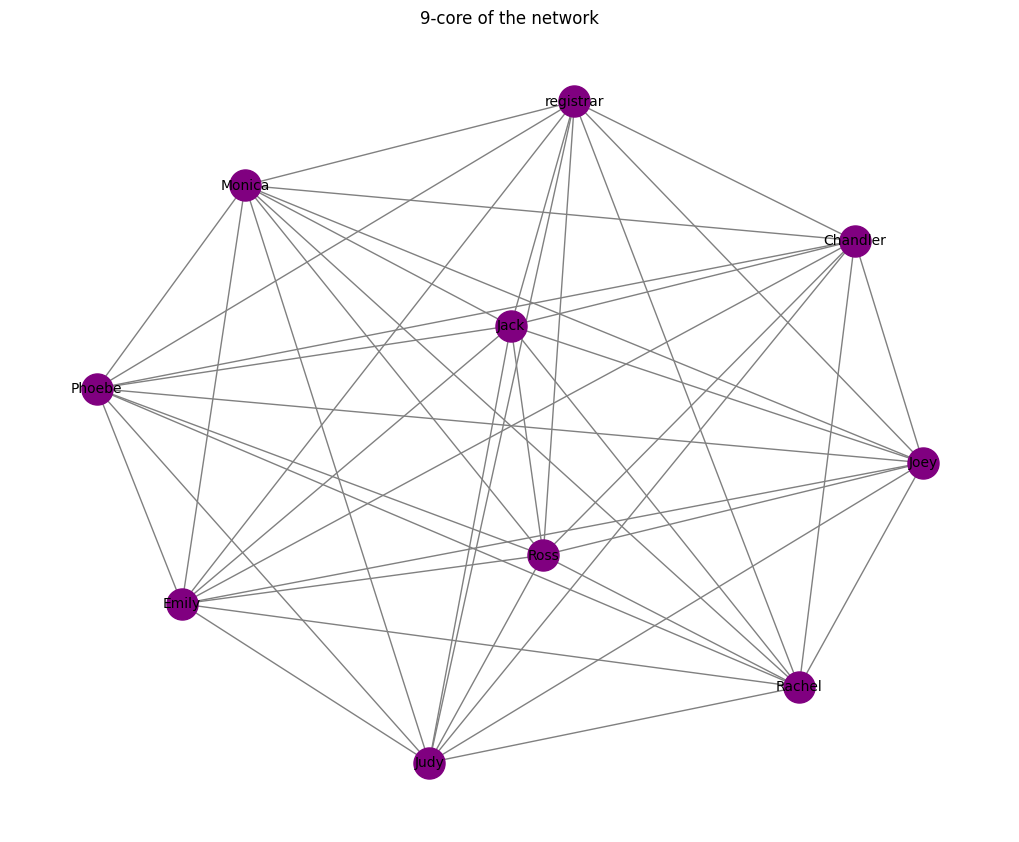

In [342]:
plot_k_plus_1_core(G, 8)

##### Interpretation

Choosing **`8`** as the parameter for **`k`** focuses on identifying the **`9-core`** of the network. The **`9-core`** includes nodes that have at least 9 connections. This parameter was chosen to pinpoint the tightest-knit group in the network, representing the most connected characters.

In the Friends network, the 9-core highlights characters who are central to the show's dynamics and have strong connections with multiple other characters. For example:
* Key characters like Joey, Chandler, and Ross appear in this core, showing their extensive interactions with others.
* Supporting characters like Emily and Judy are also present, indicating they play pivotal roles in specific subplots with strong ties to the main group.

These nodes are called "social hubs", maintaining the cohesion of the network.

## **<h2 align="center"> ★ WEEK 6 ★ </h2>** 

#### Task At Hand:

1. Treat the graph as undirected and unweighted. Deleting loops and workin on the resulting largest connected component.
2. Implement the following three techniques for community detection: 
    a) Bridge Removal (pick the partition with the highest modularity)
    b) Modularity optimization
    c) Label propagation
3. Compare the results of each technique in terms of:
    a) number of detected clusters
    b) cluster size distribution
    c) computational time
    e) modularity
    f) other aspects you consider relevant
    Results should be presented in a table
4. Given an interpretation to the differences and similarities between the three resulting partitions, and discuss which one you think is the best and why.
5. Provide a visualization for the partition you decided to be the best using Gephi
6. Optional: For each pair of partitions compute the NMI between them and discuss.

### Treating the graph as undirected and unweighted. Removing loops and work on the resulting largest connected component.

Ensuring the graph is connected:

In [343]:
print(nx.is_connected(G))

True


Testing whether nodes take their own opinions: 

In [344]:
has_self_loops = any([u == v for u, v in G.edges])
print(has_self_loops)

False


### Community Detection

#### Visualizing Communities

With this function, we are able to visualize possible **clusters/communities** with out graph $(G)$, utilizing color delineation to demonstrate them (edges are gray and nodes are colored with a rainbow colormap). 

When we call this function we can explore the structure of the graph and how the subnetworks are formed in *Friends*.

In [345]:
def visualize_clusters(graph, partition, title="Cluster Visualization"):
    color_map = {}
    for i, cluster in enumerate(partition):
        for node in cluster:
            color_map[node] = i
    
    node_colors = [color_map[node] for node in graph.nodes()]
    pos = nx.spring_layout(graph)

    plt.figure(figsize=(12, 12))
    nx.draw(
        graph,
        pos, 
        node_color=node_colors,
        cmap=plt.cm.rainbow,
        with_labels=False,
        node_size=50,
        edge_color="gray"
    )
    plt.title(title)
    plt.show()

### Bridge Removal

Utiliizng a copy of the graph, as not to alter the state of the original Graph, and then perform Bridge Removal later on.

In [346]:
G_br = G.copy()

In [347]:
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community.quality import modularity

**Girvan-Newman Algorithm:**

* We apply this algorithm to detect the communities in our graph $G$ in an iterative fashion. The theorem here centers around removing edges with the **highest betweenness centrality.**  
* We calculate the time of the parition computations.
* We utilize **Modularity** as a metric for quality per patition, basically understanding how accurately the graph has been clustered, and then we select the partition with the *HIGHEST MODULARITY*:

    * Formula for $Modularity (Q)$
$$
Q = \frac{1}{2m} \sum_{i, j} \left[ A_{ij} - \frac{k_i k_j}{2m} \right] \delta(c_i, c_j)
$$



In [348]:
def girvan_newman_bridge_removal(graph):

    start_time = time.time()
    partitions = list(nx.community.girvan_newman(graph))
    end_time = time.time()
    time_elapsed = end_time - start_time

    modularity_bridge_removal = 0
    partition_bridge_removal = None

    for partition in partitions:
        modularity = nx.community.quality.modularity(graph, partition)
        if modularity > modularity_bridge_removal:
            modularity_bridge_removal = modularity
            partition_bridge_removal = partition

    
    cluster_sizes = [len(cluster) for cluster in partition_bridge_removal]
    return partition_bridge_removal, time_elapsed, cluster_sizes, modularity_bridge_removal

Here, upacks the outputs into these four selected variables. 
* Clusters
* Time Elapsed
* Cluster Size
* Modularity

In [49]:
bridge_removal_clusters, bridge_removal_time_elapsed, bridge_removal_cluster_sizes, bridge_removal_modularity = girvan_newman_bridge_removal(G_br)

In [349]:
print(f"Clusters obtained are: {bridge_removal_clusters}", '\n')
print(f"The number of clusters obtained is: {len(bridge_removal_clusters)}")
print(f"Time elapsed: {bridge_removal_time_elapsed:.2f} seconds")
print(f"Cluster size distribution: {bridge_removal_cluster_sizes}")
print(f"Modularity is: {bridge_removal_modularity}")

Clusters obtained are: ({'Phil', 'partyGoers', 'Paul', 'Roger', 'realtorNancy', 'hooker', 'Hildy', 'Erica', 'customer1', 'Danielle', 'Jill', 'hotelClerk', 'customer3', 'mailman', 'bitterWomanStage', 'Paolo', 'Claudia', 'MrHeckles', 'MrCostilick', 'twinCarl', 'TomGordon', 'clerk', 'Shelly', 'kitchenWorker', 'Alessandro', 'MsTedlock', "Frannie'sMate", 'croupier', 'Dana', 'intern', 'funBobby', 'groomsMan', 'Marcel', 'olderGuest', 'Helen', 'Fran', 'receptionist_4_8', 'manHoneymoon', 'Paula', 'NonnaTribbiani', 'babyErica', 'Cassie', 'DrConnely', 'MrTreeger', 'tktcterAttendant', 'waitress_7_7', 'maitre_7_10', 'saleswoman', 'MrTyler', 'Julie', 'RevBong', 'Stevens', 'Gandalf', 'MsMcKenna', 'neighborWoman', 'Ethan', 'StevenFishman', 'girl_1_10', 'Tomas', 'Brian', 'nurse_9_21', 'Eddie', 'Tilly', 'adoptionAgencyWorker', 'Don', 'h.hunter(phone)', 'Bill_10', "Frannie'sFriend", 'Walter', 'reunionMember', 'nurse', 'waiter_4_10', 'customer2', 'Santos', 'pizzaGuy_10', 'waiter_2_5', 'Chandler', 'airline

##### Interpretation: 

* Clusters Obtained: 39 distinct communities were found
* Executed Time: 884.51 seconds, due to the large size graphs
* Cluster Size Distribution: 
    * Largest Cluster: 164 nodes – *indicating a certain dominant community present*
    * Smallest Cluster: 2 nodes – *isolated groups existent*
* Modularity: Score of 0.3923 – *indicating that the graph is quite strong in sctrure, however, a score that is nearer 1 would be more concrete in stating that the graph has well-separated structure*

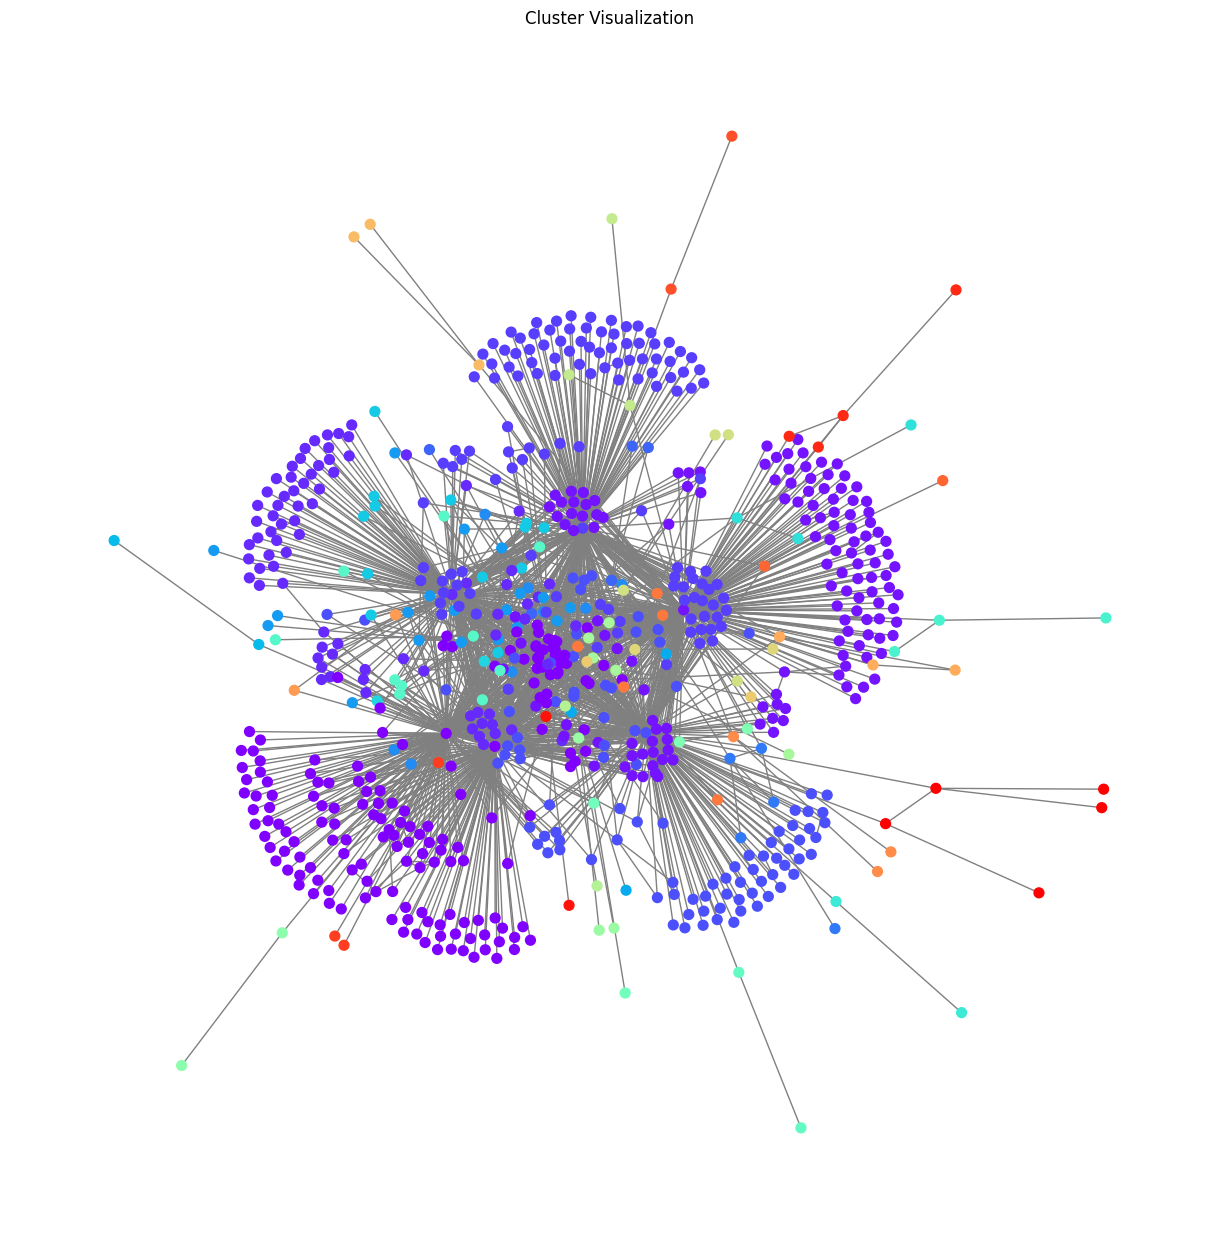

In [350]:
visualize_clusters(G_br, bridge_removal_clusters)

##### Further Interpretation:

* Certaintly distinct communities can be observed, especially densely connected to each other
* There seems to be a highly dense core, which possibly represents the most influential characters and possibly a tight-knit friend group 
    * *obviously very consistent with the concept of the **Friends** plot and storylines*. The outskirting, isolated nodes are the nodes with the least significance/importance.
* We have a Spring layout for proper human comprehension, where connections determine the position of the nodes.

### Modularity Optimization (Greedy Method)

In [351]:
from networkx.algorithms.community import greedy_modularity_communities

Here, another copy is made to compute our modularity optimization

In [352]:
G_mo = G.copy()

This function finds the communities amongst our network to reach a maximized modularity goal. We convert the clusters into "frozen sets" and then back to lists format for proper computation. The function will return the detected communities, and other variables that are are integral to optimize modularity! 

In [353]:
def modularity_optimization(graph):
    start_time = time.time()
    partition_modularity_optimization = nx.community.greedy_modularity_communities(graph)
    end_time = time.time()
    time_elapsed = end_time - start_time

    # Convert to frozenset to then be compatible with GML export
    formatted_partition = [frozenset(cluster) for cluster in partition_modularity_optimization]
    modularity = nx.community.quality.modularity(graph, formatted_partition)

    communities = [list(cluster) for cluster in formatted_partition]
    cluster_sizes = [len(cluster) for cluster in communities]

    return formatted_partition, communities, time_elapsed, cluster_sizes, modularity

In [354]:
frozen_set, modularity_optimization_clusters, modularity_optimization_time_elapsed, modularity_optimization_cluster_sizes, modularity_optimization_modularity = modularity_optimization(G_mo)

In [355]:
print(f"Clusters obtained are: {modularity_optimization_clusters}", '\n')
print(f"The number of clusters obtained is: {len(modularity_optimization_clusters)}")
print(f"Time elapsed: {modularity_optimization_time_elapsed:.2f} seconds")
print(f"Cluster size distribution: {modularity_optimization_cluster_sizes}")
print(f"Modularity is: {modularity_optimization_modularity}")

Clusters obtained are: [['director_4_14', 'Paul', 'babysfather', 'dog', 'Casey', 'smartKid', 'Clifford', 'Mable', 'Cynthia', 'Katie', 'womanAtTable', 'Lauren', 'Kash', 'director_1_21', 'Olivia', 'Guy2', 'thief', 'producer', 'castingDirector1', 'director_3_20', 'girl2InBus', 'HopeBrady', 'castingDir_2_19', 'AlZebooker', 'students_3_7', 'funBobby', 'Henrietta', 'dateSarah', 'obsessionGirl', 'messenger', 'LeslieCharleson', 'Rick', 'fan', 'dryCleaner', 'Leslie', 'tennisGirl', 'oldMan', 'patron', 'Lydia', 'Hayley', 'customer_6_12', 'castingAssistant', 'Guy1', 'Cliff', 'castingDir_5_13', 'actress(Eva)', 'director_5_18', 'womanDealer', 'guyOnTape', 'GaryCollins', 'director_3_12', 'Sandy', 'MrBowmont', 'castingDirector3', 'kid', 'MrAdelman', 'Dirk', 'apartmentGuy', 'nurse', 'Mackenzie', 'hombreMan', 'Joey', 'waiter_2_5', 'RichardCrosby', 'PBSvolunteer', 'PhoebeAsUrsula', 'Mike(addGuy)', 'passerby', 'doctor_8_14', 'stageManager', 'Raymond', 'tallGuy', 'maitre_9_5', 'Aaron', 'receptionist_9_13',

##### Interpretation:
* Clusters: 11 distinct communities etected, varying in size
* Time of Computation: quickly, in 1.20 seconds, showing how *much* more efficient this algorithm is, compared to the comples *Girvan-Newman* algorithm.
* Cluster Sizes: have a wide range of variation, indicating a mix of dense regions and isolated regions
    * Largest: 138 nodes
    * Smallest: 2 nodes
* Modularity: score is 0.4038
    * the clusters have obvious boundaries but are still somewhat integrated with the rest of the network.

*COMPARISON TO GIRVAN-NEWMAN*:
- Much more efficient, computing faster but producing fewer, more compact clusters. Girvan-Newman might be more thorough, however the time elapsed is far too slow in comparison to *Modularity Optimization*.

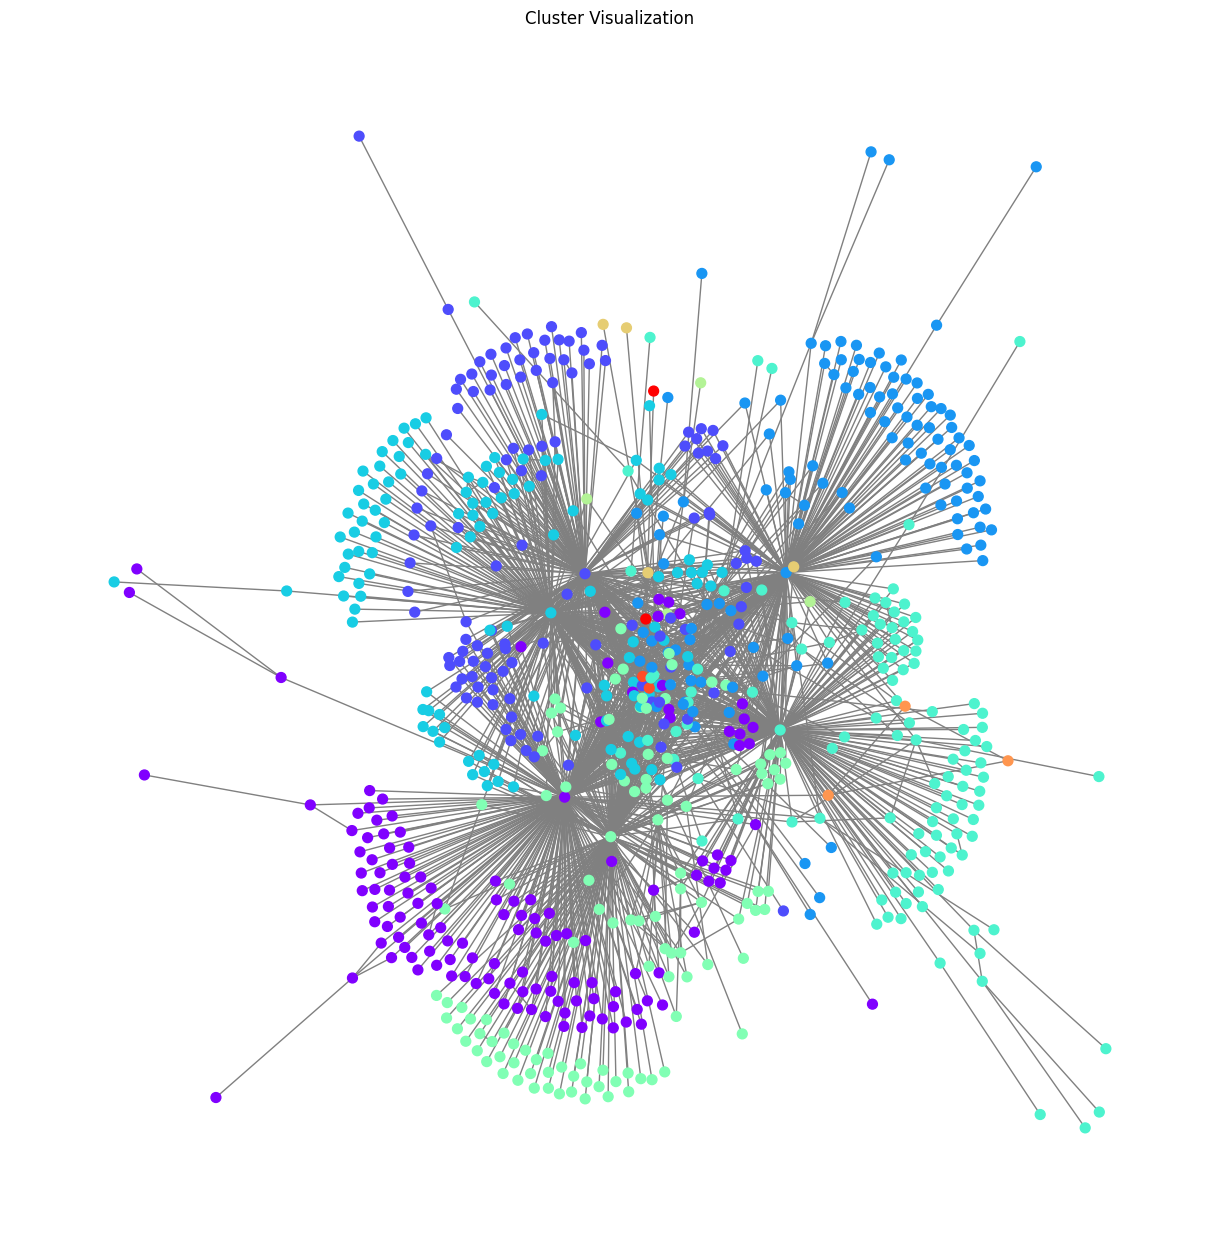

In [150]:
visualize_clusters(G_mo, modularity_optimization_clusters)

### Label Propagation

Here, we again make a copy to protect the integrity of the original graph to perform Label Propagation.

In [356]:
G_lp = G.copy()

**ASYNCHRONOUS LABEL PROPAGATION ALGORITHM (LPA)**:
- This is yet another approach at comparison, finding partitions of the graph into communities
    - This process is done iteratively
    - Evaluates based on "modularity"
    - Tracks the highest-modularity partition, the computation time, and community distributions
- LPA essentially has the nodes adopt the most frequented label amongst their surrounding neighbors, and this creates communities quickly.

The node updating rule formula:
$$
L_i = \text{argmax}_L \left( \sum_{j \in N(i)} \delta(L_j, L) \right)
$$

This explains how exactly LPA decides the label per node, per iteration.

In [357]:
def label_propagation(graph, iterations=100):
    start_time = time.time()

    max_modularity = 0
    min_modularity = float('inf')
    best_partition = None
    min_number_of_clusters = 1
    max_number_of_clusters = len(graph.nodes())

    for _ in range(iterations):
        label_propagation_communities = list(nx.community.asyn_lpa_communities(graph))
        modularity = nx.community.quality.modularity(graph, label_propagation_communities)
        number_of_clusters = len(label_propagation_communities)

        if modularity > max_modularity:
            max_modularity = modularity
            best_partition = label_propagation_communities
        
        if modularity < min_modularity:
            min_modularity = modularity
        
        if number_of_clusters > max_number_of_clusters:
            max_number_of_clusters = number_of_clusters
        if number_of_clusters < min_number_of_clusters:
            min_number_of_clusters = number_of_clusters

    end_time = time.time()
    time_elapsed = end_time - start_time
    cluster_sizes = [len(cluster) for cluster in best_partition]

    return best_partition, max_modularity, time_elapsed, cluster_sizes, min_modularity, max_modularity, min_number_of_clusters, max_number_of_clusters

In [358]:
label_propagation_clusters, max_modularity, label_propagation_time_elapsed, label_propagation_cluster_sizes, min_modularity, max_modularity, min_clusters, max_clusters = label_propagation(G_lp)

In [87]:
print(f"Clusters obtained are: {label_propagation_clusters}", '\n')
print(f"The number of clusters obtained is: {len(label_propagation_clusters)}")
print(f"Time elapsed: {label_propagation_time_elapsed:.2f} seconds")
print(f"Cluster size distribution: {label_propagation_cluster_sizes}")

print(f"Minimum modularity obtained: {min_modularity}")
print(f"Maximum modularity obtained: {max_modularity}")
print(f"Minimum number of clusters detected: {min_clusters}")
print(f"Maximum number of clusters detected: {max_clusters}")

Clusters obtained are: [{'partyGoers', 'Paul', 'Josh', 'NoraBing', 'Erica', 'customer1', 'RichardsDate', 'Nana', 'customer3', 'fakeMonica', 'twinCarl', 'Syl', 'TomGordon', 'clerk', 'kitchenWorker', 'Alessandro', "Frannie'sMate", 'BakersfieldGuy', 'croupier', 'funBobby', 'femaleStudent', 'groomsMan', 'receptionist_4_8', 'Paula', 'waitress', 'Richard', 'JayLeno', 'DrRoger', 'Jester', 'AndreaWaltham', 'waitress_7_7', 'maitre_7_10', 'saleswoman', 'Emily', 'RichardsFriend', 'neighborWoman', 'Ethan', 'Judy', 'adoptionAgencyWorker', 'JudysFriend', 'photographer_8_1', 'h.hunter(phone)', 'Cheryl', "Frannie'sFriend", 'dateRoger', 'customer2', 'waiter_4_10', 'pizzaGuy_10', 'waiter_2_5', 'Leon', 'Kara', 'moverGuy2', 'Maureen', 'vanDamme', 'auntIris', 'Lisa', 'Monica', 'Stu', 'Franny', 'doctor_5_8', 'Erika', 'auntLillian', 'registrar', 'Kori', 'moverGuy1', 'Marjorie', 'creditCardGuy', 'Lori', 'teacher', 'Doug', 'HelenaHandbasket', 'LeonRastatter', 'loungeGuy', 'pizzaGuy', 'Brenda', 'Allan', 'parame

##### Interpretation: 
* Clusters: 34 communities
* Size Distribution: 
    * Largest Cluster: 128 nodes
    * Smallest Clusters: 2 nodes
* Times Taken: 1.95 seconds - extremely efficient, especillay for such a large graph
* Modularity:
    * Minimum Modularity: 0.0226 - poor community structure for some
    * Maximum Modularity: 0.3825 - decent community structure for the best partition * With the **best** partition having a modularity of 0.3825, we can assume that there are moderately strong communities created; however, not as separated as we would like
* Number of Clusters Detected:
    * Minimum: 1 cluster  - *whole graph was likely processed as one community*
    * Maximum: 747 clusters - *possible over-granularization*

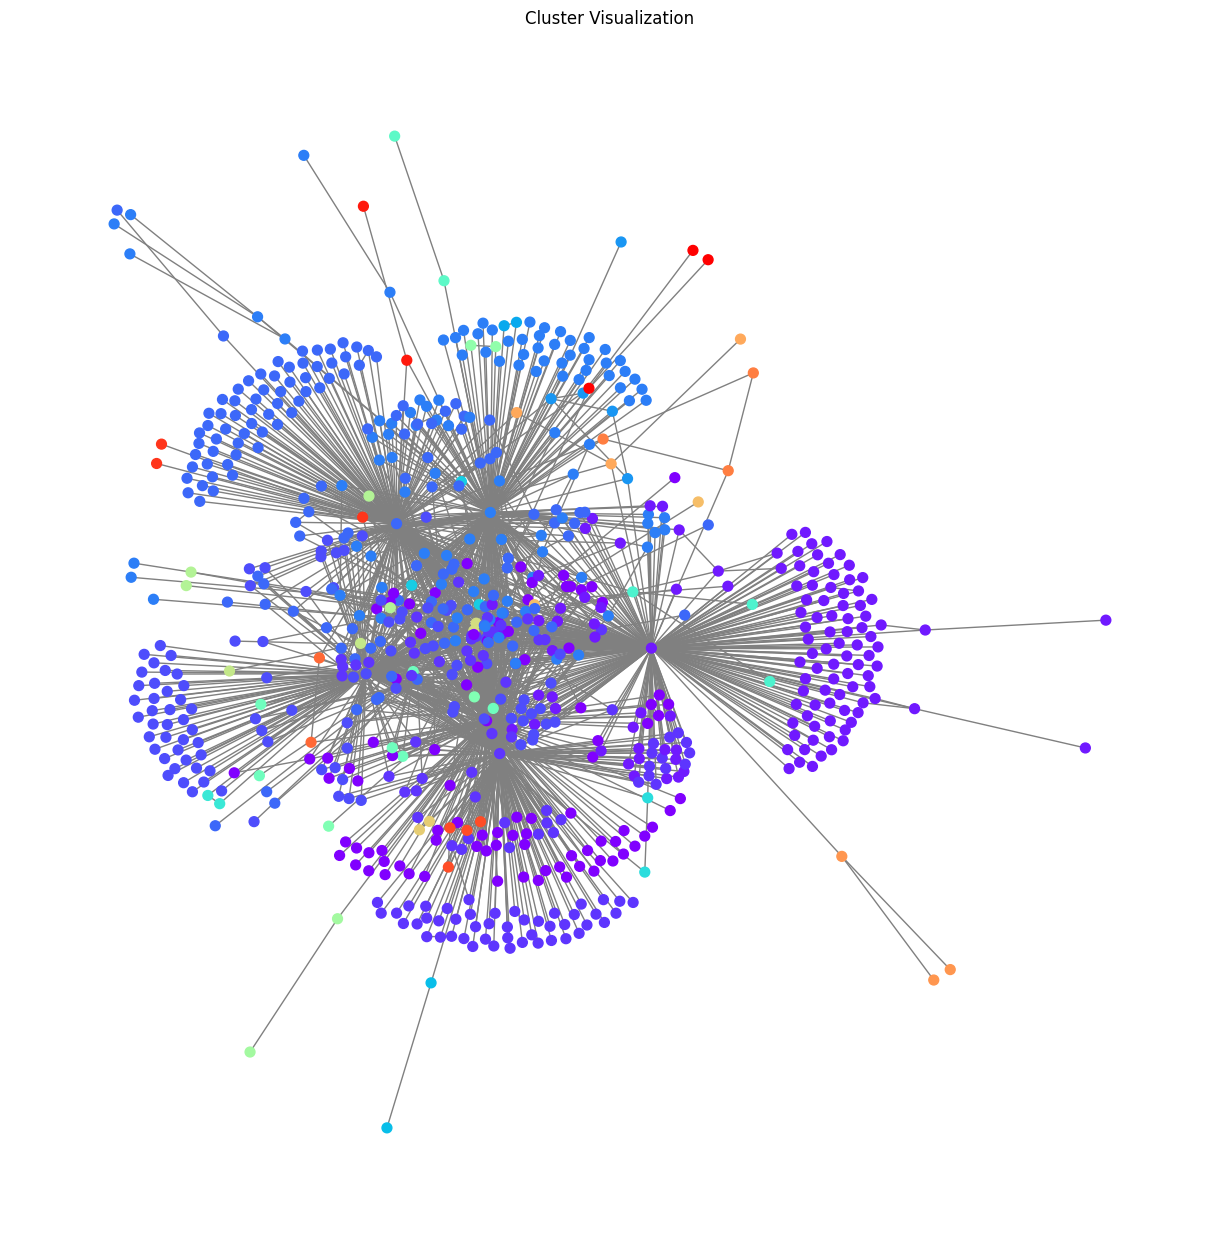

In [359]:
visualize_clusters(G_lp, label_propagation_clusters)

##### Visual Interpretation

- **Color-Coded Communities:**
    * Nodes within the same cluster are much more densely connected. The connections **between** other clusters are much sparser.
- **Community Structure:**
    * **Dense Core:** Larger clusters create dense central groups, we can assume that they are highly connected nodes.
    * **Sparse around Circumference:** Smaller/isolated groups are positioned on the outer parts of the graph.
- **Outliers:** 
    * There are some obvious lone wolves, that only connected to the graph by another isolated node - indicating these characters were irrelevant to storyline.

#### Evalutaions

**ALGORITHM COMPARISONS**:
In this section, we aimed for the output to:
* Name each clustering algorithm 
* Calculate the modularity score computed per algorithm
* Determine time per computation
* Identify Cluster Amount
* Determine size per community 

**OUR 3 CONTENDERS:**
1. `Bridge Removal (Girvan-Newman)`:
    * The betweenness centrality of an edge is utilized to decide which edges to remove. Edge Betweennes Centrality:
    $$
    C_B(e) = \sum_{s \neq t} \frac{\sigma_{st}(e)}{\sigma_{st}}
    $$

2. `Modularity Optimization`:
    * Modularity (Q) measures the "quality" of each partition of the graph into clusters: Modularity Formula:
    $$
    Q = \frac{1}{2m} \sum_{i, j} \left[ A_{ij} - \frac{k_i k_j}{2m} \right] \delta(c_i, c_j)
    $$

3. `Label Propagation`
    * Label Updating Rules throuought the propagation process, to spread lables amongst nodes:
    $$
    L_i = \text{argmax}_L \left( \sum_{j \in N(i)} \delta(L_j, L) \right)
    $$


In [360]:
headers = ["Algorithm", "Modularity", "Time (s)", "Number of Detected Clusters", "Cluster Size Distribution"]

data = [
    [
        "Bridge Removal (Girvan-Newman)",
        bridge_removal_modularity,
        bridge_removal_time_elapsed,
        len(bridge_removal_clusters),
        bridge_removal_cluster_sizes # Distribution
    ],
    [
        "Modularity Optimization",
        modularity_optimization_modularity,
        modularity_optimization_time_elapsed,
        len(modularity_optimization_clusters),
        modularity_optimization_cluster_sizes # Distribution
    ],
    [
        "Label Propagation",
        max_modularity,
        label_propagation_time_elapsed,
        len(label_propagation_clusters),
        label_propagation_cluster_sizes # Distribution
    ]
]

In [361]:
from tabulate import tabulate

In [362]:
print(tabulate(data, headers=headers, tablefmt="grid", floatfmt=".4f"))

+--------------------------------+--------------+------------+-------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
| Algorithm                      |   Modularity |   Time (s) |   Number of Detected Clusters | Cluster Size Distribution                                                                                                        |
+================================+==============+============+===============================+==================================================================================================================================+
| Bridge Removal (Girvan-Newman) |       0.3923 |   844.5090 |                            39 | [164, 143, 81, 126, 95, 5, 5, 8, 19, 3, 2, 13, 2, 3, 2, 3, 10, 2, 2, 2, 2, 3, 5, 2, 3, 4, 2, 2, 3, 3, 2, 3, 5, 2, 2, 3, 4, 2, 5] |
+--------------------------------+--------------+------------+-------------------------------+--

##### Interpretation

- We can determine that `Modularity Optimization` is the greatest option, considering both quality (highest resulting modularity) and time efficieny of **1.2** seconds!
- `Bridge Removal` is wonderful for a more detailed and intricate community detection task; however, it is far too compuationally expensive, at **14.1 minutes**.
- `Label Propagation`: is also quite efficient, in comparison to the previous, and is useful for graph as large as this. That being, said, `Modularity Optimization` in confront with LPA outperforms in time and modularity score. 

#### **`Gephi` Visualization**: 

* As an open-source network, it can assist us in exploring and conceptualizing our extremely large, dense *Friends* network! We select our best, most efficient model `Modularity Optimization` and apply it.

Here, we create a second function for `Modularity Optimization` to retrieve solely the node attributes. We detect communities in our graph G using the Greedy Algorithm. 
* We will group nodes into clusters to maximize our modularity scores.
* The larger modularity values indicate well-delineating communnities 

In [363]:
def mo(graph):
    partition = nx.community.greedy_modularity_communities(graph)
    return partition

Here, we run assign a unique ID per cluster and map their respective nodes to designated clusters. We then use `Community Detection Algorithm` (mo function) to add community attributes to the nodes within the graph. We export them to a .gml file containing this information

In [364]:
def export_communities_to_gml(graph, detection_algorithm, output_file):
    partition_map = {}
    modularity_communities = detection_algorithm(graph)
    for community_id, community_nodes in enumerate(modularity_communities):
        for node in community_nodes:
            partition_map[node] = community_id

    nx.set_node_attributes(graph, partition_map, name="clusters")
    nx.write_gml(graph, output_file)

In [365]:
export_communities_to_gml(G_mo, mo, "friends_mo.gml")

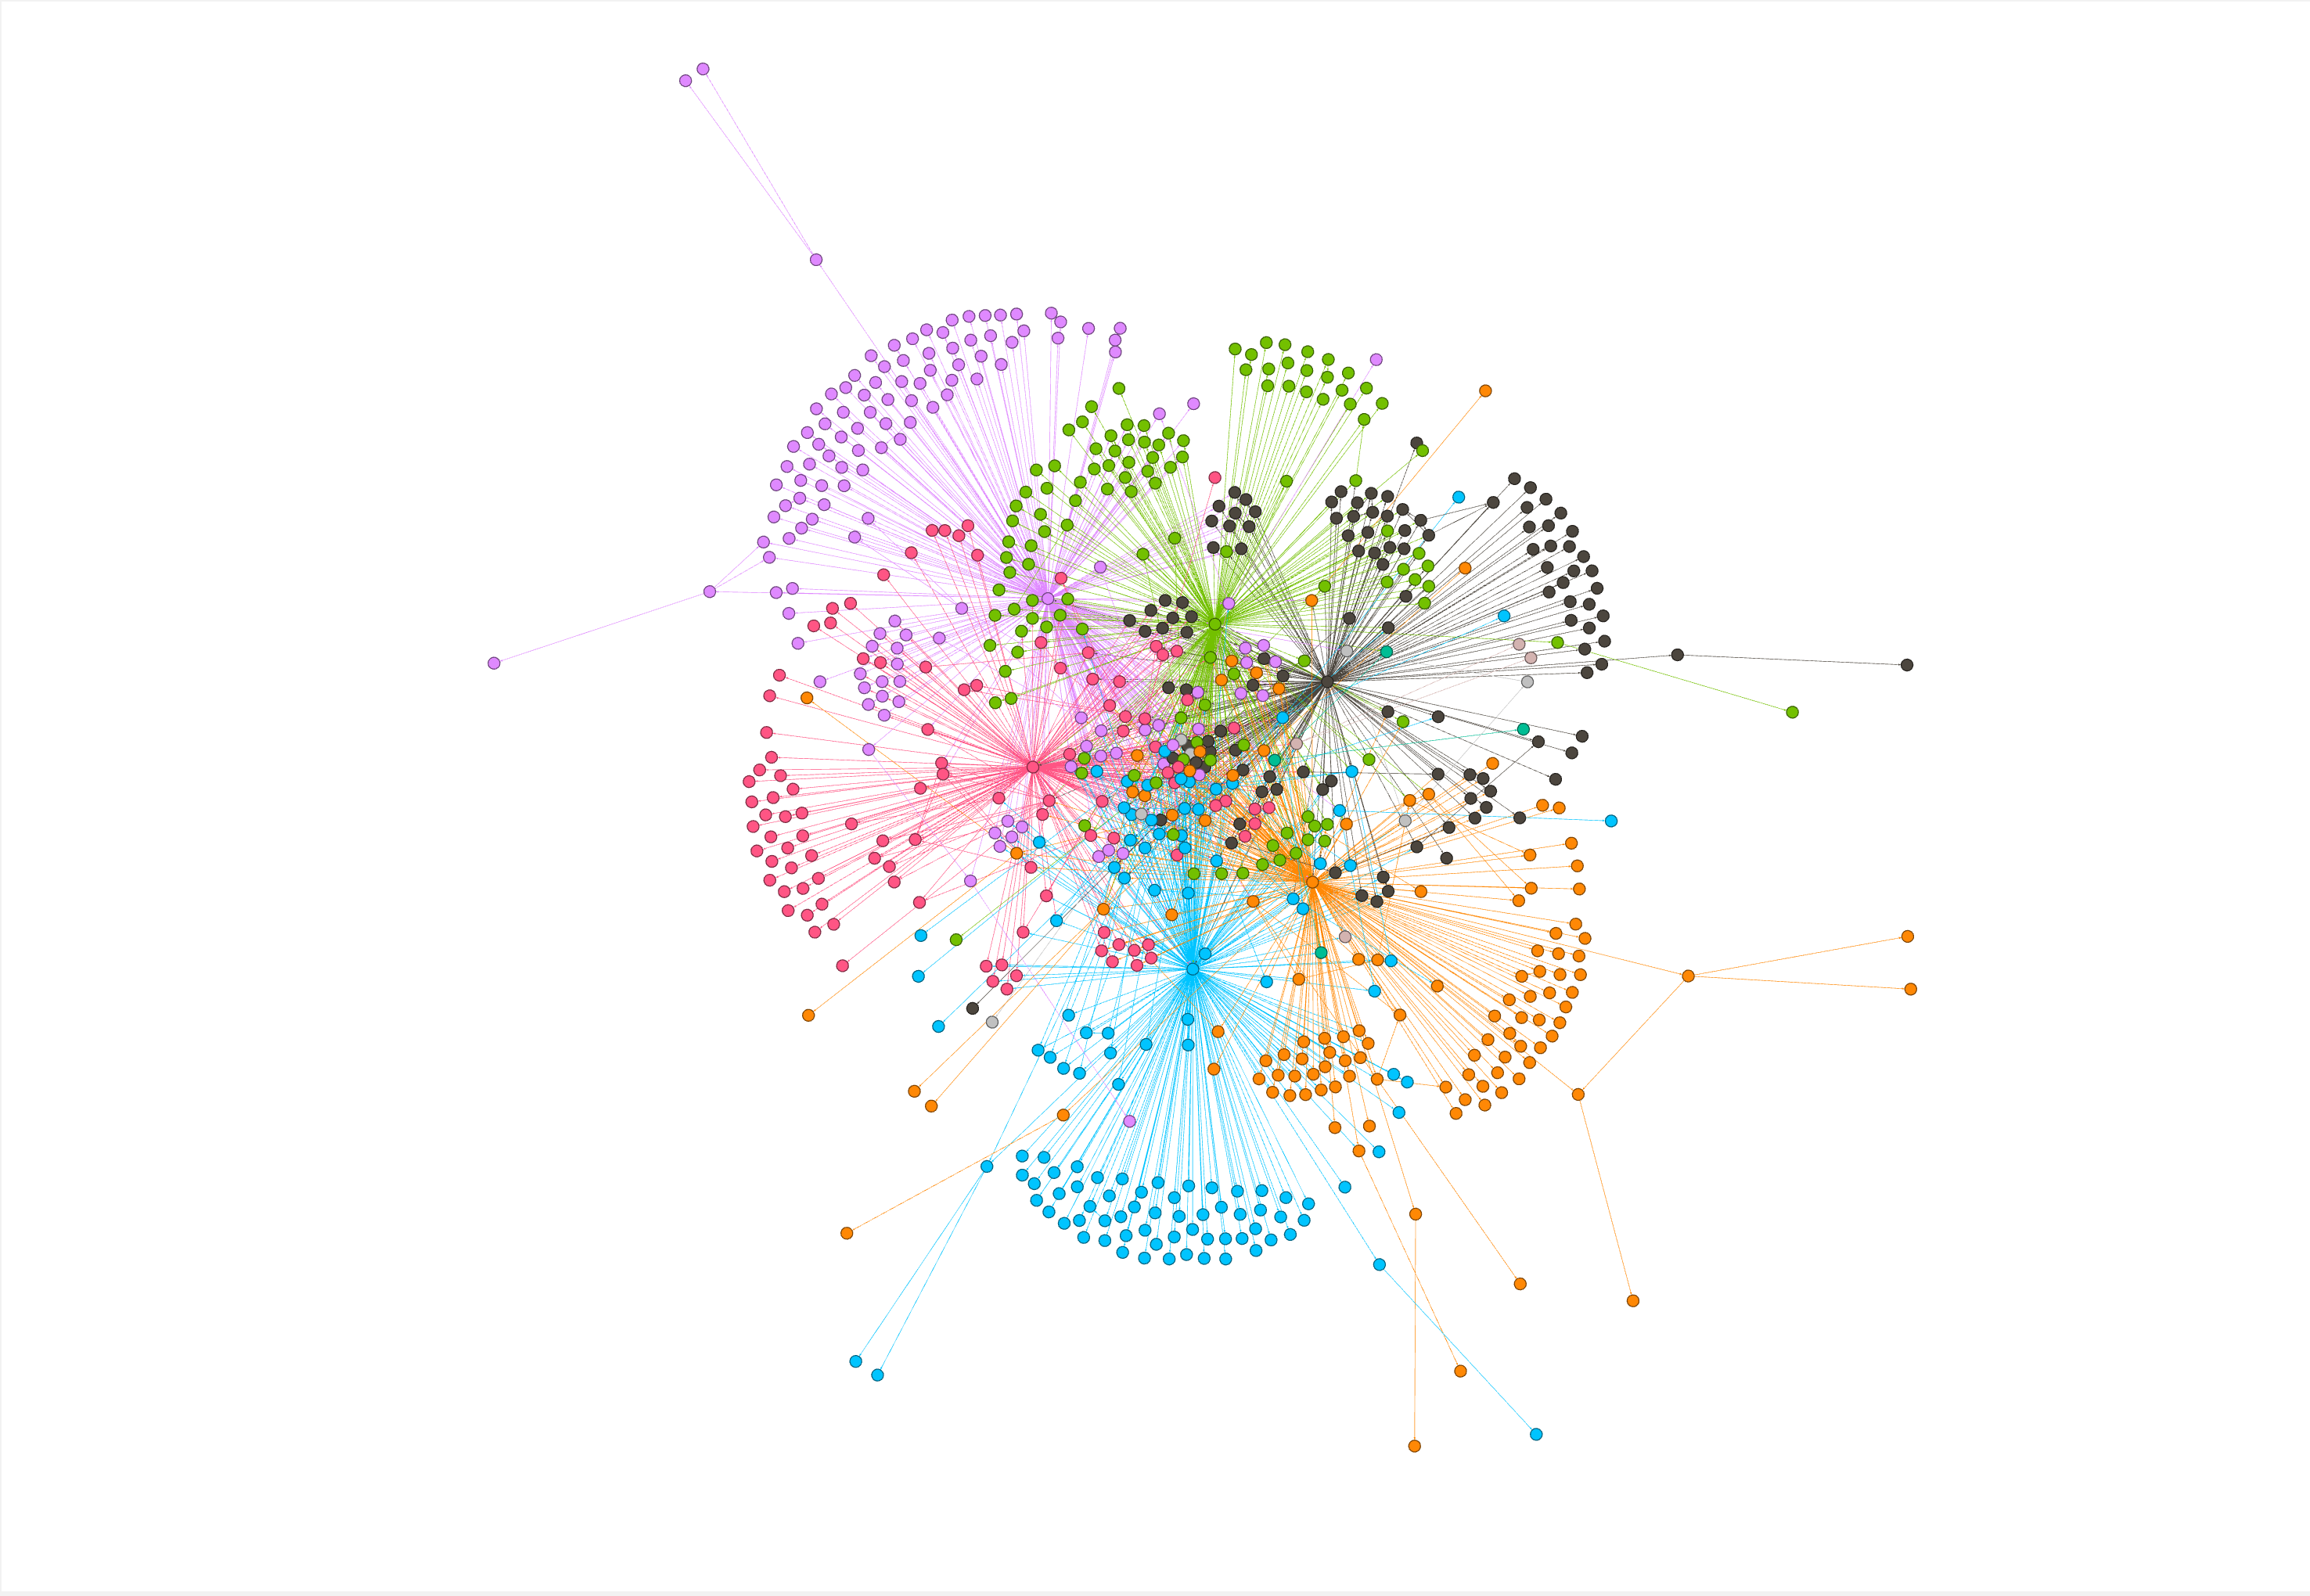

In [366]:
from IPython.display import Image

Image(filename='friends_mo.png')

##### Visual Interpretation

* We have a clear distinguished delineation amongst communities, and the density has much more clarity. 
* Our densely connected communities are still present, associated by color
* We also have spare Inter-Community Connections, with edges being colored as well to indicate the connecting clusters.
* Gephi's layout algorithm (ForceAtlas2) allows us to see the large network be spread out, and can refresh out tight-knit friend groups and relationships for elevated vieiwing!

## **<h2 align="center"> ★ WEEK 7 ★ </h2>** 

#### Task At Hand:

1. Treat your graph as undirected and unweighted, and work on the resulting largest connected component. Delete loops
2. Create a function computing CN and one for the topological indices between JI, PA, AA, RA. Your function should return a pandaframe where each row is a missing link and each column is an index. You are allowed to use built-in functions from NetworkX for computing individual indices.
3. Create a third score by adding a column with the sum of the two indices. [NB: the arithmetic mean should be computed after rescaling each column between 0 and 1].
4. For each of the 3 scores, identify as missing links the node pairs yieling the largest 5/10 values.
5. Optional: Invent a new index/score and compare the result.

### Computing CN and PA, and the sum of the two

Create a copy of the original graph just in case we change it.

In [367]:
G_cn_pa = G.copy()

The function **`compute_gn_pa(graph)`**, calculates two metrics for all non-edges (pairs of nodes without a direct connection) in a graph: the number of common neighbors (CN) and the preferential attachment (PA) score. It iterates through all non-edges, computes the CN by finding shared neighbors, and calculates the PA score using NetworkX's built-in preferential attachment method. The results are stored in a dictionary and converted into a Pandas DataFrame, with additional columns for readability. Finally, it adds a "Sum" column combining CN and PA scores, providing a combined measure of link prediction likelihood for non-connected nodes. This helps identify potential missing links in a graph.

In [368]:
def compute_cn_pa(graph):
    non_edges = list(nx.non_edges(graph))
    indices = {}
    
    for edge in non_edges:
        common_neighbors = list(nx.common_neighbors(graph, edge[0], edge[1]))
        cn = len(common_neighbors)
        
        pa = nx.preferential_attachment(graph, [(edge[0], edge[1])])
        pa_value = next(pa)[2]
        
        indices[edge] = [cn, pa_value]
    
    row_labels = [f"({edge[0]}, {edge[1]})" for edge in indices.keys()]
    columns = ["CN", "PA"]
    df = pd.DataFrame.from_dict(indices, orient='index', columns=columns)
    df.index = row_labels
    
    df["Sum"] = df["CN"] + df["PA"]
    return df

In [369]:
result_missing_links = compute_cn_pa(G_cn_pa)
result_missing_links

CN  PA  Sum
(neighborSteve, Phil)           0   2    2
(neighborSteve, Amanda(date))   1   2    3
(neighborSteve, partyGoers)     0   2    2
(neighborSteve, Casey)          0   2    2
(neighborSteve, realtorNancy)   0   2    2
...                            ..  ..  ...
(robot, fireman2)               0   2    2
(robot, Cal)                    1   1    2
(Cal, Maria)                    0   1    1
(Cal, fireman2)                 0   2    2
(Maria, fireman2)               0   2    2

[277021 rows x 3 columns]

##### Interpretation

This table shows the computed metrics for non-existing edges in the graph. Each pair represents a potential connection between nodes, with "CN" (common neighbors) indicating the shared neighbors between the two nodes, and "PA" (preferential attachment) representing their likelihood of forming a connection based on their degrees. The "Sum" column combines these values, offering a score to prioritize missing link predictions. For example, **`(neighborSteve, Amanda(date))`** has a CN of 1 and a PA of 2, making its combines score 3, suggesting a slightly higher connection likelihood compared to pairs like **`(neighborSteve, Phil)`** with a lower CN and the same PA.


### Computation of the arithmetic mean

This function computer the Common Neighbors (CN) and Preferential Attachment (PA) metrics for all non-edges in the graph and calculates the arithmetic mean after scaling the metrics. It first generates a list of non-edges and iterates over them to calculate the CN and PA values for each pair. These values are stored in a dictionary and coverted into a DataFrame. The CN and PA columns are then scaled using Min-Max scaling to normalize their values between 0 and 1. Finally, the mean of the scaled CN and PA valeus is computed for each non-edge and returned as a new column in the DataFrame. This helps in evaluating potential edges with a standardized metric.

In [370]:
def compute_cn_pa_with_mean(graph):
    non_edges = list(nx.non_edges(graph))
    indices = {}
    
    for edge in non_edges:
        common_neighbors = list(nx.common_neighbors(graph, edge[0], edge[1]))
        cn = len(common_neighbors)
        
        pa = nx.preferential_attachment(graph, [(edge[0], edge[1])])
        pa_value = next(pa)[2]
        
        indices[edge] = [cn, pa_value]
        
    row_labels = [f"{edge[0]}, {edge[1]}" for edge in indices.keys()]
    columns = ["CN", "PA"]
    df = pd.DataFrame.from_dict(indices, orient='index', columns=columns)
    df.index = row_labels
    
    scaler = MinMaxScaler()
    df[["CN", "PA"]] = scaler.fit_transform(df[["CN", "PA"]])
    
    df["Mean"] = df[["CN", "PA"]].mean(axis=1)
    return df

In [371]:
result_missing_links_scores = compute_cn_pa_with_mean(G_cn_pa)
result_missing_links_scores

CN        PA     Mean
neighborSteve, Phil          0.000  0.000339  0.00017
neighborSteve, Amanda(date)  0.125  0.000339  0.06267
neighborSteve, partyGoers    0.000  0.000339  0.00017
neighborSteve, Casey         0.000  0.000339  0.00017
neighborSteve, realtorNancy  0.000  0.000339  0.00017
...                            ...       ...      ...
robot, fireman2              0.000  0.000339  0.00017
robot, Cal                   0.125  0.000000  0.06250
Cal, Maria                   0.000  0.000000  0.00000
Cal, fireman2                0.000  0.000339  0.00017
Maria, fireman2              0.000  0.000339  0.00017

[277021 rows x 3 columns]

##### **Interpretation**:

This table shows the computed scores for potential missing links in the graph using scaled values of Common Neighbors (CN) and Preferential Attachment (PA), along with their arithmetic mean. Each row represents a pair of nodes (non-edges) and provides their CN, PA, and the mean score. Higher mean scores, such as the one for **`(neighborSteve, Amanda(date))`**, suggest a stronger likelihood of a potential connection between those nodes based on the similarity and connectivity metrics. This analysis can help identify plausible relationships or missing links in the network.

### For each of the 3 scores, identify as missing links the node pairs yielding the largest 5/10 values

This code defines a function **`display_top_links`** to identify and display the top **`n`** node pairs with the highest scores in a DataFrame. The function checks if the provided **`score_columns`** exists in the DataFrame, and if not, it exits with an error message. If a **`secondary_column`** is provided, the function sorts the rows by both columns in descending order; otherwise, it sorts only by the primary **`score_column`**. The top **`n`** results are then printed for analysis. This function helps prioritize the strongest potential missing links in a graph based on computed scores like Common Neighbors (CN), Preferential Attachment (PA), or their sum

In [372]:
def display_top_links(df, score_column, secondary_column=None, top_n=5):
    if score_column not in df.columns:
        print(f"Column '{score_column}' not found in DataFrame.")
        return
    
    if secondary_column:
        if secondary_column not in df.columns:
            print(f"Secondary column '{secondary_column}' not found in DataFrame. Falling back to single sorting.")
            top_links = df.sort_values(by=score_column, ascending=False).head(top_n)
        else:
            top_links = df.sort_values(by=[score_column, secondary_column], ascending=[False, False]).head(top_n)
    else:
        top_links = df.sort_values(by=score_column, ascending=False).head(top_n)
    
    print(f"Top {top_n} node pairs for {score_column} (sorted):\n", top_links, "\n")

In [373]:
# Since the results were the same for the CN, we decided to do a double sorting with also the PA
display_top_links(result_missing_links, "CN", secondary_column="PA")
display_top_links(result_missing_links, "PA")
display_top_links(result_missing_links, "Sum")

Top 5 node pairs for CN (sorted):
                            CN    PA   Sum
(Joey, Joshua)              8  2948  2956
(Chandler, AndreaWaltham)   8  2133  2141
(Susan, Rachel)             8  2052  2060
(Rachel, AndreaWaltham)     8  2052  2060
(Jack, Gunther)             8   306   314 

Top 5 node pairs for PA (sorted):
                            CN    PA   Sum
(Joey, Joshua)              8  2948  2956
(Monica, Joshua)            6  2277  2283
(Chandler, Susan)           7  2133  2140
(Chandler, AndreaWaltham)   8  2133  2141
(Susan, Rachel)             8  2052  2060 

Top 5 node pairs for Sum (sorted):
                            CN    PA   Sum
(Joey, Joshua)              8  2948  2956
(Monica, Joshua)            6  2277  2283
(Chandler, AndreaWaltham)   8  2133  2141
(Chandler, Susan)           7  2133  2140
(Susan, Rachel)             8  2052  2060 



##### **Interpretation**:

This output shows the top 5 node pairs in the graph ranked by three different metrics: CN, PA, and their combined Sum. High CN values indicate strong local connectivity, meaninf the nodes share many mutual neighbors. PA highlights global connectivity by favoring nodes that are already highly connected. The Sum provides a balance between these two metrics. For example, the pair **`(Joey, Joshua)`** consistently ranks the highest in all metrics, suggesting both local and global connectivity between them, making them strong candidates for potential links in the network. This highlights key relationships that could enhance the graph structure, reflecting dynamics similar to relationships in the **`Friends`** network.

### Optional: Invent a new index/score and compare the result

## **<h2 align="center"> ★ WEEK 9 ★ </h2>** 

#### Task At Hand:

1. Depending on what seems more appropriate in our graph, we picked the Preferential Attachment.
2. Choose the parameter to obtain the correct average degree and compare at least one other characteristics.

### Analyzing the original graph (G)

#### Nodes and edges

In [374]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 747
Number of edges: 1610


#### Average Degree

In [375]:
print(f"Average degree of G: {average_degree}")

Average degree of G: 4.310575635876841


#### Clustering coefficient

In [376]:
clustering_coefficient = nx.average_clustering(G)
print(f"The clustering coefficient is: {clustering_coefficient}")

The clustering coefficient is: 0.5002643179271571


We create a copy of the graph as G9 in case changes happen in the original one.

In [377]:
G9 = G.copy()

### Create a new graph composed by the main characters

This creates an empty graph **`N`** and adds the main characters from Friends as nodes in the graph.

We will be needing this later to help initialize our custom function.

In [378]:
N = nx.Graph()
main_characters = ["Rachel", "Monica", "Ross", "Chandler", "Joey", "Phoebe"]
N.add_nodes_from(main_characters)

This adds edges between all pairs of the main characters in the graph, making it a fully connected network where each character is connected to every other character.

In [379]:
for i in range(len(main_characters)):
    for j in range(i + 1, len(main_characters)):
        N.add_edge(main_characters[i], main_characters[j])

### Graph of the main characters

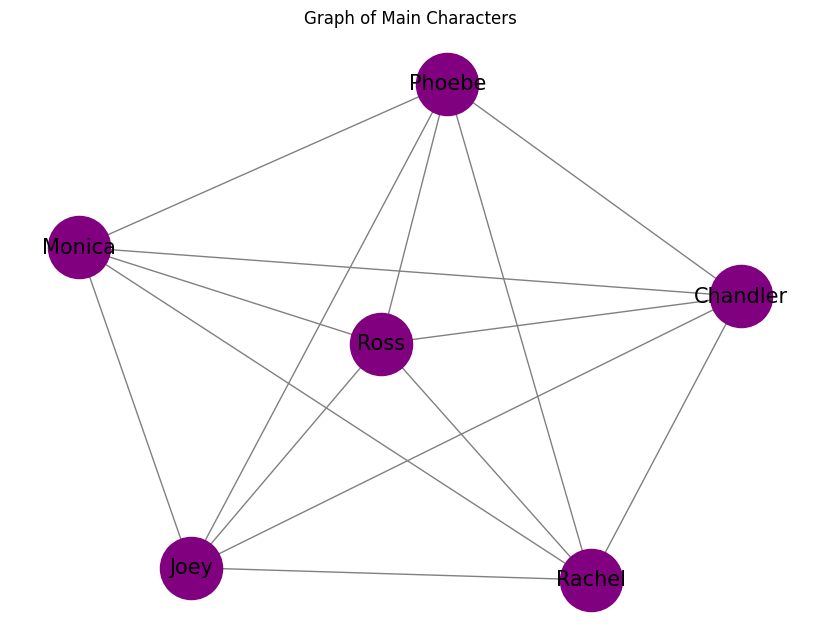

In [380]:
plt.figure(figsize=(8, 6))
nx.draw(
    N,
    with_labels=True,
    node_color='purple',
    edge_color='gray',
    node_size=2000,
    font_size=15
)
plt.title("Graph of Main Characters")
plt.show()

##### **Interpretation**:

* We can see here, that we created a fully connected component with only the main characters. 
* This graph will serve as a base later on.

### Function for Preferential Attachment

#### Why PA?

We chose Preferential Attachment because it reflects the dynamics of the **`Friends`** social network, where well-connected characters like Joey and Ross tend to form more connections, acting as central "hubs" in the group. This model mirrors how relationships in the show naturally revolve around key individuals, making it a great fit for capturing the social structure of the group without overcomplicating the connections

#### **Approach #1:** `Built-in Function`

The built-in function uses NetworkX'a **`barabasi_albert_graph`** to generate a graph based on preferential attachment. The parameters **`num_nodes`** and **`m`** define the number of nodes in the graph and the number of edges each new node forms, respectively. This method models networks like social media, where popular nodes (like main characters of Friends) attract more connections over time.

In [381]:
def generate_preferential_attachment_graph(num_nodes, m):
    # m is the number of edges added per new node
    return nx.barabasi_albert_graph(num_nodes, m)

In [382]:
m3 = generate_preferential_attachment_graph(747, 3)
print(m3)

Graph with 747 nodes and 2232 edges


#### **Approach #2:** Our own function

We also tried to create our own function to make the difference from the built-in, but as we can see the results vary by a small amount. This happends due to the random selection and subsequent handling of isolates, that might result in one fewer or one additional edge due to rounding. The second reason is that our function adds specific checks for isolated nodes and manually adds extra edges, leading to slight deviations. This is why, from now on we will choose the built-in function.

In [383]:
def preferential_attachment(N, new_node, m):
    degrees = dict(N.degree())
    total_degree = sum(degrees.values())
    attachment_probabilities = {node: degree / total_degree for node, degree in degrees.items()}

    selected_nodes = set()
    while len(selected_nodes) < m:
        node = random.choices(
            population=list(attachment_probabilities.keys()),
            weights=list(attachment_probabilities.values()),
            k=1,
        )[0]
        selected_nodes.add(node)
    
    for node in selected_nodes:
        N.add_edge(new_node, node)
    
    if not nx.is_connected(N):
        isolated_nodes = list(nx.isolates(N))
        if isolated_nodes:
            N.add_edge(new_node, random.choice(list(N.nodes)))

In [384]:
# Looping through 7 (next node after 6) to (748, 1 more than 747)
for i in range(7, 748):
    new_node = f"Node_{i}"
    N.add_node(new_node)
    preferential_attachment(N, new_node, m=3)

In [385]:
print(f"Number of nodes: {N.number_of_nodes()}")
print(f"Nummber of edges: {N.number_of_edges()}")

Number of nodes: 747
Nummber of edges: 2238


### Finding the optimal M

This code defines a function to find the optimal parameter **`m`** for generating a preferential attachment graph that closely matches the average degree of a given original graph. It iterates over possible values of **`m`** (number of edges added per new node), generates graphs for each **`m`**, and calculates their average degree. It compares the generated graph's average degree to the target average degree of the original graph, selecting **`m`** that minimizes this difference. Additionally, it computes the clustering coefficient for the best-matching graph for further analysis. This is useful for modeling real-world networks like the **`Friends`** graph with realistic connectivity.

In [386]:
def find_optimal_m(original_graph, max_m=10):
    num_nodes = original_graph.number_of_nodes()
    target_avg_degree = 2 * original_graph.number_of_edges() / num_nodes

    best_m = None
    best_difference = float('inf')
    best_clustering_coefficient = None

    for m in range(1, max_m + 1):
        gen_graph = generate_preferential_attachment_graph(num_nodes, m)
        gen_avg_degree = 2 * gen_graph.number_of_edges() / gen_graph.number_of_nodes()
        difference = abs(target_avg_degree - gen_avg_degree)

        if difference < best_difference:
            best_difference = difference
            best_m = m
            best_clustering_coefficient = nx.average_clustering(gen_graph)
    
    return best_m, target_avg_degree, best_difference, best_clustering_coefficient

In [387]:
optimal_m, target_avg_degree, difference, opt_clustering_coeff = find_optimal_m(G9)

In [388]:
print(f"Optimal m: {optimal_m}")
print(f"Target Average Degree: {target_avg_degree:.4f}")
print(f"Difference in Average Degree: {difference:.4f}")
print(f"Clustering Coefficient with Optimal m: {opt_clustering_coeff:.4f}")

Optimal m: 2
Target Average Degree: 4.3106
Difference in Average Degree: 0.3213
Clustering Coefficient with Optimal m: 0.0344


### Results Comparison

In [389]:
optimal_graph = generate_preferential_attachment_graph(G9.number_of_nodes(), optimal_m)

In [390]:
opt_avg_degree = 2 * optimal_graph.number_of_edges() / optimal_graph.number_of_nodes()
opt_clustering_coeff = nx.average_clustering(optimal_graph)

In [391]:
data2 = {
    "Metric": ["Number of Nodes", "Number of Edges", "Average Degree", "Clustering Coefficient"],
    "Original Graph": [
        G9.number_of_nodes(),
        G9.number_of_edges(),
        round(average_degree, 4),
        round(clustering_coefficient, 4,),
    ],
    "Optimal Graph": [
        optimal_graph.number_of_nodes(),
        optimal_graph.number_of_edges(),
        round(opt_avg_degree, 4),
        round(opt_clustering_coeff, 4),
    ],
}

In [392]:
characteristics = pd.DataFrame(data2)
characteristics

Metric  Original Graph  Optimal Graph
0         Number of Nodes        747.0000       747.0000
1         Number of Edges       1610.0000      1490.0000
2          Average Degree          4.3106         3.9893
3  Clustering Coefficient          0.5003         0.0292

##### **Interpretation**:

This table compares metrics between the original Friends graph and the optimal preferential attachment graph generated. Both graphs have the same number of nodes (747), but the optimal graph has fewer edges, leading to a slightly lower average degree. The clustering coefficient is much higher in the original graph, indicating the original graph has more tightly connected groups, which reflects real-world social dynamics better than the generated graph. This suggests the preferential attachment model approximates the structure but misses the higher clustering typical in real-worl relationships like Friends.

## **<h2 align="center"> ★ WEEK 10 ★ </h2>** 

#### Task At Hand:

1. Depending on what seems more relevant in our graph we decided to choose the Independent Cascade Model.
2. Investigate different scenario of outbreak in your graph (different sizes of outbreaks, different origins, different parameters). 

We first create a new copy of our graph just in case there are some changes made in it

In [393]:
G10 = G.copy()

### Independent Cascade Model (ICM)

#### Why Independent Cascade Model?

The **`Independent Cascade Model`** is a great choice for studying how spreading influence works in networks because it's simple, realistic and flexible. It uses a probabilistic approach to simulate whether one node can influence its neighbors, which mirrors real-life scenarios like viral marketing or information sharing.

ICM is effective because it lets us test different parameters, like the initial set of nodes (seeds) or the probability of influence (prob), making it adaptable to various scenarios.

Using the **`Independent Cascade Model`** on the Friends graph helps analyze how influence or information spreads among characters, identifying key players like Joey or Ross who have the most impact. It allows us to compare the spread from central versus peripheral characters, revealing influence dynamics and the network's structure. By experimenting with different scenarios, we can understand the network's resilience, how quickly influence saturates, and which characters are critical for maximizing reach.

#### **`independent_cascade_model()`**

This code defines the **`independent_cascade_model()`**, which simulates how influence or information spreads in a network. Starting with a set of "seed" nodes, it iteratively infects their neighbors based on a given probability (prob). At each step, newly infected nodes attempt to infect their neighbors, and this process continues until no new nodes are infected. The function returns the set of all infected nodes, helping analyze how far influence can propagate from the initial seeds.

In [394]:
def independent_cascade_model(graph, seed_nodes, prob):
    infected = set(seed_nodes)
    newly_infected = set(seed_nodes)

    while newly_infected:
        next_infected = set()
        for node in newly_infected:
            for neighbor in graph.neighbors(node):
                if neighbor not in infected:
                    if random.random() < prob:
                        next_infected.add(neighbor)

        infected.update(next_infected)
        newly_infected = next_infected
        
    return infected

### Stochastic Function

This function simulates the spread of influence in a graph over multiple runs. It calculates metrics like total infected nodes, average speed, and the best or worst cases in terms of speed. If specific starting nodes **`(fixed_seeds)`** are given, those are used; otherwise, random seed nodes are selected. The **`Independent Cascade Model`** is applied in each simulation to compute the spread size. The function tracks the minimum and maximum spread along with the seed nodes responsible for those outcomes. Finally, it returns these metrics to evaluate the spread dynamics across simulations.

In [450]:
def stochastic(graph, num_simulations, prob, seed_count=6, fixed_seeds=None):
    total_infected = 0
    min_spread = float('inf')
    max_spread = 0
    best_seed_min = []
    best_speed_max = []

    for i in range(num_simulations):
        if fixed_seeds:
            seeds = fixed_seeds
        else:
            seeds = random.sample(list(graph.nodes), seed_count)

        infected = independent_cascade_model(graph, seeds, prob)
        spread_size = len(infected)

        total_infected += spread_size

        if spread_size < min_spread:
            min_spread = spread_size
            best_speed_min = seeds
        
        if spread_size > max_spread:
            max_spread = spread_size
            best_speed_max = seeds
    
    avg_spread = total_infected / num_simulations

    return {
        "total_infected": total_infected,
        "average_spread": avg_spread,
        "min_spread": min_spread,
        "max_spread": max_spread,
        "best_seed_min": best_seed_min,
        "best_seed_max": best_speed_max,
    }

### Using different origins

#### Results - *using the main characters*

When the main characters of the show were chosen as the seed nodes, the spread results were the highest overall. This aligns with expectations, as these characters are central to the narrative and interact with almost everyone. Their high centrality ensures that their influence reaches more nodes quickly and broadly, making them the most impactful starting points for information spread.

In [412]:
main_characters = ["Rachel", "Monica", "Phoebe", "Ross", "Chandler", "Joey"]

In [430]:
icm_main_characters = stochastic(G10, num_simulations=100, prob=0.1, fixed_seeds=main_characters)

In [431]:
print(f"Total Infected Nodes Across Simulations: {icm_main_characters['total_infected']}")
print(f"Average Spread: {icm_main_characters['average_spread']}")
print(f"Minimum Spread: {icm_main_characters['min_spread']}")
print(f"Maximum Spread: {icm_main_characters['max_spread']}")

Total Infected Nodes Across Simulations: 14107
Average Spread: 141.07
Minimum Spread: 108
Maximum Spread: 174


#### Results, VERSION II - *using random characters*

The random characters produced lower average spreads compared to the main characters, showing that centrality and strategic positioning in the network matter. Since the selection was random, some seeds were less connected, which limited the overall influence and resulted in more varied outcomes across simulations.

In [451]:
icm_random_characters = stochastic(G10, num_simulations=100, seed_count=6, prob=0.1)

In [452]:
print(f"Total Infected Nodes Across Simulations: {icm_random_characters['total_infected']}")
print(f"Average Spread: {icm_random_characters['average_spread']}")
print(f"Minimum Spread: {icm_random_characters['min_spread']}")
print(f"Maximum Spread: {icm_random_characters['max_spread']}")

Total Infected Nodes Across Simulations: 11044
Average Spread: 110.44
Minimum Spread: 6
Maximum Spread: 174


#### Results, VERSION III - *using some of the least important characters*

#### From the centralities we found in week 3

Choosing the least important characters resulted in the lowest spreads. These nodes are likely on the periphery of the network, with minimal connection to others. This demonstrates how starting points with low centrality reduce the effectiveness of influence propagation, reinforcing the importance of node positioning in network dynamics.

In [434]:
least_important_characters = [
    character[0] for character in sorted(centralities.items(), key=lambda x: x[1])[:6]
]
print("Least important characters by betweenness centrality:")
print(least_important_characters)

Least important characters by betweenness centrality:
['waitress', 'Paul', 'Franny', 'Marsha', 'Robbie', 'DrOberman']


In [435]:
icm_least_important_characters = stochastic(G10, num_simulations=100, prob=0.1, fixed_seeds=least_important_characters)

In [436]:
print(f"Total Infected Nodes Across Simulations: {icm_least_important_characters['total_infected']}")
print(f"Average Spread: {icm_least_important_characters['average_spread']}")
print(f"Minimum Spread: {icm_least_important_characters['min_spread']}")
print(f"Maximum Spread: {icm_least_important_characters['max_spread']}")

Total Infected Nodes Across Simulations: 10930
Average Spread: 109.3
Minimum Spread: 6
Maximum Spread: 169


#### Plotting different origins

In [468]:
origins = ["Main Characters", "Random Characters", "Least Important Characters"]

total_infected_origins = [
    icm_main_characters['total_infected'],
    icm_random_characters['total_infected'],
    icm_least_important_characters['total_infected'],
    ]

average_spread_origins = [
    icm_main_characters['average_spread'],
    icm_random_characters['average_spread'],
    icm_least_important_characters['average_spread'],
    ]

min_spread_origins = [
    icm_main_characters['min_spread'],
    icm_random_characters['min_spread'],
    icm_least_important_characters['min_spread'],
    ]

max_spread_origins = [
    icm_main_characters['max_spread'],
    icm_random_characters['max_spread'],
    icm_least_important_characters['max_spread'],
    ]

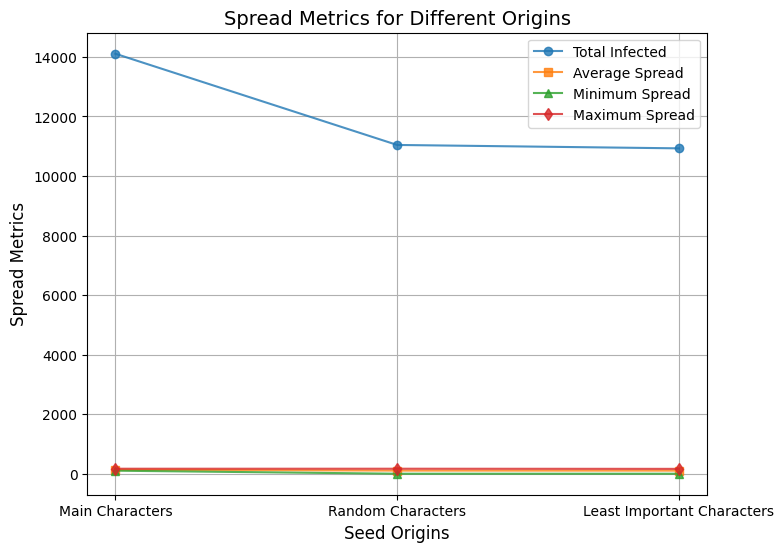

Total Infected Origins: [14107, 11044, 10930]
Maximum Speed Origins: [174, 174, 169]


In [484]:
plt.figure(figsize=(8, 6))
plt.plot(origins, total_infected_origins, marker='o', label="Total Infected", alpha=0.8)
plt.plot(origins, average_spread_origins, marker='s', label="Average Spread", alpha=0.8)
plt.plot(origins, min_spread_origins, marker='^', label="Minimum Spread", alpha=0.8)
plt.plot(origins, max_spread_origins, marker='d', label="Maximum Spread", alpha=0.8)

plt.xlabel("Seed Origins", fontsize=12)
plt.ylabel("Spread Metrics", fontsize=12)
plt.title("Spread Metrics for Different Origins", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

print("Total Infected Origins:", total_infected_origins)
print("Maximum Speed Origins:", max_spread_origins)

##### Interpretation

The graph ilustrates how the choice of seed characters impacts the spread of influence in the **`Friends`** grapg. The main characters--central figures like Rachel, Joey, and Ross--result in the highest spread, as their central roles in the network allow influence to quickly propagate to a larfe number of nodes. Random characters, being a mix of central and peripheral nodes, show a moderate spread. The least important characters, such as minor or isolated figures in the network, lead to the smallest spread due to their limited connections. This emphasizes how the social structure of **`Friends`** reflects the characters' roles in driving influence.

### Using different sizes

#### Size 2

When we use a seed count of 2, the spread is relatively low, with a total infected count of 4825 and an average spread of 48.25. This small starting point means fewer initial connections, leading to limited propagation and a minimal spread of only 2 nodes at times.

In [453]:
icm_size_2 = stochastic(G10, num_simulations=100, prob=0.1, seed_count=2)

In [454]:
print(f"Total Infected Nodes Across Simulations: {icm_size_2['total_infected']}")
print(f"Average Spread: {icm_size_2['average_spread']}")
print(f"Minimum Spread: {icm_size_2['min_spread']}")
print(f"Maximum Spread: {icm_size_2['max_spread']}")

Total Infected Nodes Across Simulations: 4825
Average Spread: 48.25
Minimum Spread: 2
Maximum Spread: 157


#### Size 3

Increasing the seed count to 3 slightly improves the spread. This additional seed introduces more starting connections, increasing the chance of reaching more nodes while maintaining a moderate minimum spread of 3.

In [455]:
icm_size_3 = stochastic(G10, num_simulations=100, prob=0.1, seed_count=3)

In [456]:
print(f"Total Infected Nodes Across Simulations: {icm_size_3['total_infected']}")
print(f"Average Spread: {icm_size_3['average_spread']}")
print(f"Minimum Spread: {icm_size_3['min_spread']}")
print(f"Maximum Spread: {icm_size_3['max_spread']}")

Total Infected Nodes Across Simulations: 5820
Average Spread: 58.2
Minimum Spread: 3
Maximum Spread: 162


#### Size 4

With 4 seeds, the infection spreads further. This shows that as we add more starting points, the graph becomes more interconnected, which amplifies the influence and increases the propagation speed.

In [457]:
icm_size_4 = stochastic(G10, num_simulations=100, prob=0.1, seed_count=4)

In [458]:
print(f"Total Infected Nodes Across Simulations: {icm_size_4['total_infected']}")
print(f"Average Spread: {icm_size_4['average_spread']}")
print(f"Minimum Spread: {icm_size_4['min_spread']}")
print(f"Maximum Spread: {icm_size_4['max_spread']}")

Total Infected Nodes Across Simulations: 7535
Average Spread: 75.35
Minimum Spread: 4
Maximum Spread: 169


#### Size 5

At 5 seeds, the spread reaches its highest so far. This confirms that a higher seed count lead to more initial activation points, resulting in better coverage of the network and ensuring maximum potential spread.

In [459]:
icm_size_5 = stochastic(G10, num_simulations=100, prob=0.1, seed_count=5)

In [460]:
print(f"Total Infected Nodes Across Simulations: {icm_size_5['total_infected']}")
print(f"Average Spread: {icm_size_5['average_spread']}")
print(f"Minimum Spread: {icm_size_5['min_spread']}")
print(f"Maximum Spread: {icm_size_5['max_spread']}")

Total Infected Nodes Across Simulations: 8817
Average Spread: 88.17
Minimum Spread: 5
Maximum Spread: 170


#### Plotting the different sizes

In [466]:
sizes = [2, 3, 4, 5]
total_infected_sizes = [
    icm_size_2['total_infected'],
    icm_size_3['total_infected'],
    icm_size_4['total_infected'],
    icm_size_5['total_infected']
    ]

average_spread_sizes = [
    icm_size_2['average_spread'],
    icm_size_3['average_spread'],
    icm_size_4['average_spread'],
    icm_size_5['average_spread'],
    ]

min_spread_sizes = [
    icm_size_2['min_spread'],
    icm_size_3['min_spread'],
    icm_size_4['min_spread'],
    icm_size_5['min_spread']
    ]

max_spread_sizes = [
    icm_size_2['max_spread'],
    icm_size_3['max_spread'],
    icm_size_4['max_spread'],
    icm_size_5['max_spread']
    ]

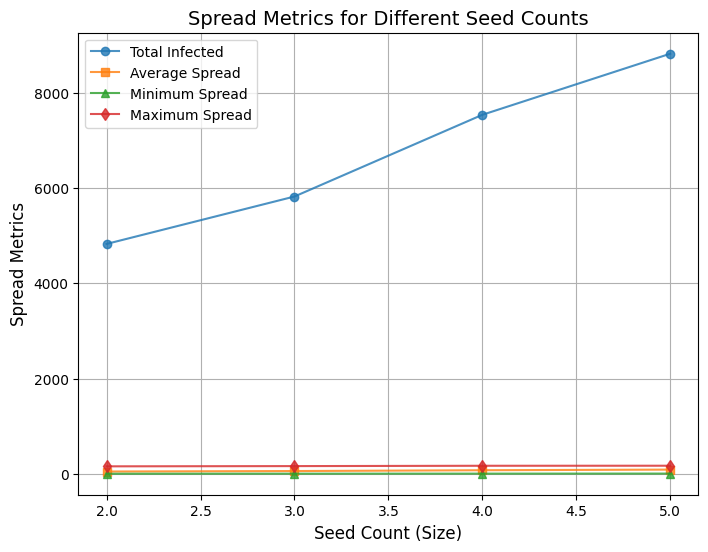

Total Infected Sizes: [4825, 5820, 7535, 8817]
Maximum Speed Sizes: [157, 162, 169, 170]


In [467]:
plt.figure(figsize=(8, 6))
plt.plot(sizes, total_infected_sizes, marker='o', label="Total Infected", alpha=0.8)
plt.plot(sizes, average_spread_sizes, marker='s', label="Average Spread", alpha=0.8)
plt.plot(sizes, min_spread_sizes, marker='^', label="Minimum Spread", alpha=0.8)
plt.plot(sizes, max_spread_sizes, marker='d', label="Maximum Spread", alpha=0.8)

plt.xlabel("Seed Count (Size)", fontsize=12)
plt.ylabel("Spread Metrics", fontsize=12)
plt.title("Spread Metrics for Different Seed Counts", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

print("Total Infected Sizes:", total_infected_sizes)
print("Maximum Speed Sizes:", max_spread_sizes)

##### Interpretation

This graph shows how increasing the number of starting characters (seeds) in the **`Friends`** graph impacts the spread of influence. As the seed count grows, the total infected nodes and average spread increase, reflecting how more characters initiating the spread result in wider influence across the group. The maximum spread remain stable, likely because the close-knit structure of the graph limits how far influence can reachm even with more seeds. Meanwhile, the minimum spread stays low, showing that even in **`Friends`**, some characters or connections may not engage effectively in certain scenarios.

### Using different simulations

#### 50 simulations

With 50 simulations, the spread remain relatively low. This provides a small-scale perspective, capturing initial patterns but might not fully represent broader dynamics.

In [471]:
icm_simulation_50 = stochastic(G10, num_simulations=50, prob=0.1)

In [472]:
print(f"Total Infected Nodes Across Simulations: {icm_simulation_50['total_infected']}")
print(f"Average Spread: {icm_simulation_50['average_spread']}")
print(f"Minimum Spread: {icm_simulation_50['min_spread']}")
print(f"Maximum Spread: {icm_simulation_50['max_spread']}")

Total Infected Nodes Across Simulations: 5199
Average Spread: 103.98
Minimum Spread: 6
Maximum Spread: 166


#### 100 simulations

At 100 simulations, the total infected nodes increase significantly and the average speed rises. This shows a more consistent spread pattern and highlights a more reliable view of propagation within the graph.

In [473]:
icm_simulation_100 = stochastic(G10, num_simulations=100, prob=0.1)

In [474]:
print(f"Total Infected Nodes Across Simulations: {icm_simulation_100['total_infected']}")
print(f"Average Spread: {icm_simulation_100['average_spread']}")
print(f"Minimum Spread: {icm_simulation_100['min_spread']}")
print(f"Maximum Spread: {icm_simulation_100['max_spread']}")

Total Infected Nodes Across Simulations: 10789
Average Spread: 107.89
Minimum Spread: 6
Maximum Spread: 173


#### 200 simulations

With 200 simulations, the total infected nodes double. This indicates that as simulations increase, the spread metrics become more stable, providing a clearer picture of how influence propagates.

In [477]:
icm_simulation_200 = stochastic(G10, num_simulations=200, prob=0.1)

In [479]:
print(f"Total Infected Nodes Across Simulations: {icm_simulation_200['total_infected']}")
print(f"Average Spread: {icm_simulation_200['average_spread']}")
print(f"Minimum Spread: {icm_simulation_200['min_spread']}")
print(f"Maximum Spread: {icm_simulation_200['max_spread']}")

Total Infected Nodes Across Simulations: 21564
Average Spread: 107.82
Minimum Spread: 6
Maximum Spread: 176


#### 350 simulations

At 350 simulations, the total infected nodes increase a lot. This shows that increasing simulations further confirms trends and validates results, ensuring robustness in understanding the Friends network propagation dynamics.

In [480]:
icm_simulation_350 = stochastic(G10, num_simulations=350, prob=0.1)

In [481]:
print(f"Total Infected Nodes Across Simulations: {icm_simulation_350['total_infected']}")
print(f"Average Spread: {icm_simulation_350['average_spread']}")
print(f"Minimum Spread: {icm_simulation_350['min_spread']}")
print(f"Maximum Spread: {icm_simulation_350['max_spread']}")

Total Infected Nodes Across Simulations: 36398
Average Spread: 103.99428571428571
Minimum Spread: 6
Maximum Spread: 175


#### Plotting different simulations

In [482]:
simulations = [50, 100, 200, 350]
total_infected_simulations = [
    icm_simulation_50['total_infected'],
    icm_simulation_100['total_infected'],
    icm_simulation_200['total_infected'],
    icm_simulation_350['total_infected']
    ]

average_spread_simulations = [
    icm_simulation_50['average_spread'],
    icm_simulation_100['average_spread'],
    icm_simulation_200['average_spread'],
    icm_simulation_350['average_spread'],
    ]

min_spread_simulations = [
    icm_simulation_50['min_spread'],
    icm_simulation_100['min_spread'],
    icm_simulation_200['min_spread'],
    icm_simulation_350['min_spread']
    ]

max_spread_simulations = [
    icm_simulation_50['max_spread'],
    icm_simulation_100['max_spread'],
    icm_simulation_200['max_spread'],
    icm_simulation_350['max_spread']
    ]

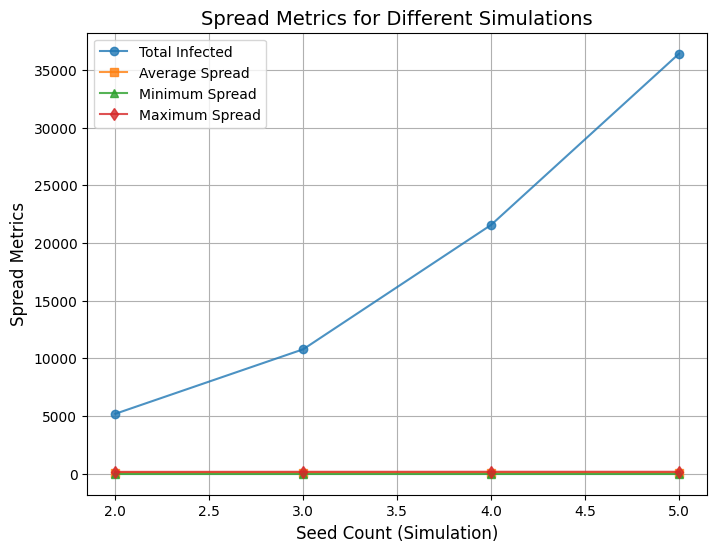

Total Infected Simulations: [5199, 10789, 21564, 36398]
Maximum Speed Simulations: [166, 173, 176, 175]


In [483]:
plt.figure(figsize=(8, 6))
plt.plot(sizes, total_infected_simulations, marker='o', label="Total Infected", alpha=0.8)
plt.plot(sizes, average_spread_simulations, marker='s', label="Average Spread", alpha=0.8)
plt.plot(sizes, min_spread_simulations, marker='^', label="Minimum Spread", alpha=0.8)
plt.plot(sizes, max_spread_simulations, marker='d', label="Maximum Spread", alpha=0.8)

plt.xlabel("Seed Count (Simulation)", fontsize=12)
plt.ylabel("Spread Metrics", fontsize=12)
plt.title("Spread Metrics for Different Simulations", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

print("Total Infected Simulations:", total_infected_simulations)
print("Maximum Speed Simulations:", max_spread_simulations)

##### **Interpretation**

This graph shows how increasing the number of simulations affects the spread metrics within the Friends network. As the simulations increase, the total infected nodes rise significantly, showing a more accurate and reliable understanding of influence or information propagates among the characters. The average spread stabilizes, which means additional simulations help confirm consistent spreading patterns. This highlights the robustness of the **`Independent Cascade Model`** in simulating realistic social network behaviors like interactions in **`Friends`**.

## **<h3 align="center"> ★ Thank You ★ </h3>** 